In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import sklearn
from sklearn.feature_selection import SelectKBest, chi2, f_regression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import scikitplot as skplt
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.model_selection import StratifiedKFold
from logitreg.logitreg import charts as ch, iv, lreg
import scorecardpy
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import validation_curve, learning_curve
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve, auc, classification_report
from mdl_evaluation_plots import *


%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve2(estimator, title, X, y, axes=None, ylim=None, cv=5,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5), scoring = 'recall'):

    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes, scoring = scoring,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

In [3]:
# Reference: 

"""
https://www.mathworks.com/help/fininst/prepayment-modeling-with-a-two-factor-hull-white-model.html
"""

'\nhttps://www.mathworks.com/help/fininst/prepayment-modeling-with-a-two-factor-hull-white-model.html\n'

In [4]:
def round_sig(x, N=2):
    """
    round to N significant digits
    :param x: input
    :param N: # of digits
    :return:
    """

    if np.floor(np.log10(abs(x))) == np.inf:
        # -1 for invalid zero division.
        return -1

    return 0 if x == 0 else round(x, N - int(np.floor(np.log10(abs(x)))))

In [5]:
# Read the data in chunks


chunks = pd.read_csv('C:/Users/scui/Downloads/data-full.csv', chunksize = 40000)
df_full = pd.DataFrame()
for chunk in chunks:
    df_full = df_full.append(chunk)
df_full.reset_index(drop=True, inplace=True)
df_full.head()


,loan_id,deal_no,factor_date,last_date,dflt_flag,eb,tp,inv_bal,close_bal,wala,mba,mtl,issuer,svcr,init_rate,close_date,mba_prev,mba_prev2,mba_prev6,mba_code,mba_prev_code,mba_apr,last_mba,inv_bal_p1,inv_bal_p2,tp_dflt,tp_vol,d30_bal,d60_bal,d90p_bal,dqt_bal,dflt_amt,loss_amt,loss_amt_inact,noloss_dflt_flag,noloss_dflt,sev,sev_bucket,inv_bal_sdq_p1,ltv,cltv,fico_bucket,oltv_bucket,cltv_bucket,olsz_bucket,clsz_bucket,geo,occ_bucket,purp_bucket,mod_date,iss_bal_atdt,doc_type,covid_flag,ptd_actual,ptd_reported,first_covid_date,pre_covid_ptd,cd_servicer,cd_mstr_servicer,cd_defer_delta,mba_imp,mba_imp_prev,mba_imp_code,mba_imp_prev_code,covid_flag_adj,deal_cpn,?column?,covid_flag_adj_prev,ever_covid_before_flag_adj,covid_end_flag,covid_start_flag,covid_restart_flag,is_prepay
0,AEvnnR,AA181,2018-05-01,2019-12-01,0,0.00,0.00,613218.72,613218.72,5,C,1.0,Arroyo,UNKNOWN,5.375,2018-05-17,NaN,NaN,NaN,1,NaN,0,C,NaN,NaN,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,NaN,0,0.0,70.0,66.826350,680-739,60 - 79,60 - 79,600k-1mm,600k-1mm,CA,investor,Purchase,NaN,0.0,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,NaN,1,NaN,0,5.27773,1,NaN,0,0,0,0,0
1,AEvnnR,AA181,2018-06-01,2019-12-01,0,612516.01,706.96,611809.05,613218.72,6,C,1.0,Arroyo,UNKNOWN,5.375,2018-05-17,C,NaN,NaN,1,1.0,0,C,613218.72,NaN,0.0,706.96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,NaN,0,0.0,70.0,66.353530,680-739,60 - 79,60 - 79,600k-1mm,600k-1mm,CA,investor,Purchase,NaN,0.0,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,C,1,1.0,0,5.27773,1,0.0,0,0,0,0,0
2,AEvnnR,AA181,2018-07-01,2019-12-01,0,611100.02,840.11,610259.91,613218.72,7,C,1.0,Arroyo,UNKNOWN,5.375,2018-05-17,C,C,NaN,1,1.0,0,C,611809.05,613218.72,0.0,840.11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,NaN,0,0.0,70.0,65.921729,680-739,60 - 79,60 - 79,600k-1mm,600k-1mm,CA,investor,Purchase,NaN,0.0,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,C,1,1.0,0,5.27773,1,0.0,0,0,0,0,0
3,AEvnnR,AA181,2018-08-01,2019-12-01,0,609543.95,-2.38,609546.33,613218.72,8,C,1.0,Arroyo,UNKNOWN,5.375,2018-05-17,C,C,NaN,1,1.0,0,C,610259.91,611809.05,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,NaN,0,0.0,70.0,65.710023,680-739,60 - 79,60 - 79,600k-1mm,600k-1mm,CA,investor,Purchase,NaN,0.0,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,C,1,1.0,0,5.27773,1,0.0,0,0,0,0,0
4,AEvnnR,AA181,2018-09-01,2019-12-01,0,608827.17,840.12,607987.05,613218.72,9,C,1.0,Arroyo,UNKNOWN,5.375,2018-05-17,C,C,NaN,1,1.0,0,C,609546.33,610259.91,0.0,840.12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,NaN,0,0.0,70.0,65.519354,680-739,60 - 79,60 - 79,600k-1mm,600k-1mm,CA,investor,Purchase,NaN,0.0,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,C,1,1.0,0,5.27773,1,0.0,0,0,0,0,0


Save file for faster reload next time

In [6]:
df_full = df_full.drop('is_prepay', axis = 1)

In [7]:
df_full

,loan_id,deal_no,factor_date,last_date,dflt_flag,eb,tp,inv_bal,close_bal,wala,mba,mtl,issuer,svcr,init_rate,close_date,mba_prev,mba_prev2,mba_prev6,mba_code,mba_prev_code,mba_apr,last_mba,inv_bal_p1,inv_bal_p2,tp_dflt,tp_vol,d30_bal,d60_bal,d90p_bal,dqt_bal,dflt_amt,loss_amt,loss_amt_inact,noloss_dflt_flag,noloss_dflt,sev,sev_bucket,inv_bal_sdq_p1,ltv,cltv,fico_bucket,oltv_bucket,cltv_bucket,olsz_bucket,clsz_bucket,geo,occ_bucket,purp_bucket,mod_date,iss_bal_atdt,doc_type,covid_flag,ptd_actual,ptd_reported,first_covid_date,pre_covid_ptd,cd_servicer,cd_mstr_servicer,cd_defer_delta,mba_imp,mba_imp_prev,mba_imp_code,mba_imp_prev_code,covid_flag_adj,deal_cpn,?column?,covid_flag_adj_prev,ever_covid_before_flag_adj,covid_end_flag,covid_start_flag,covid_restart_flag
0,AEvnnR,AA181,2018-05-01,2019-12-01,0,0.00,0.00,613218.72,613218.72,5,C,1.0,Arroyo,UNKNOWN,5.375,2018-05-17,NaN,NaN,NaN,1,NaN,0,C,NaN,NaN,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,NaN,0,0.0,70.0,66.826350,680-739,60 - 79,60 - 79,600k-1mm,600k-1mm,CA,investor,Purchase,NaN,0.0,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,NaN,1,NaN,0,5.277730,1,NaN,0,0,0,0
1,AEvnnR,AA181,2018-06-01,2019-12-01,0,612516.01,706.96,611809.05,613218.72,6,C,1.0,Arroyo,UNKNOWN,5.375,2018-05-17,C,NaN,NaN,1,1.0,0,C,613218.72,NaN,0.0,706.96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,NaN,0,0.0,70.0,66.353530,680-739,60 - 79,60 - 79,600k-1mm,600k-1mm,CA,investor,Purchase,NaN,0.0,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,C,1,1.0,0,5.277730,1,0.0,0,0,0,0
2,AEvnnR,AA181,2018-07-01,2019-12-01,0,611100.02,840.11,610259.91,613218.72,7,C,1.0,Arroyo,UNKNOWN,5.375,2018-05-17,C,C,NaN,1,1.0,0,C,611809.05,613218.72,0.0,840.11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,NaN,0,0.0,70.0,65.921729,680-739,60 - 79,60 - 79,600k-1mm,600k-1mm,CA,investor,Purchase,NaN,0.0,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,C,1,1.0,0,5.277730,1,0.0,0,0,0,0
3,AEvnnR,AA181,2018-08-01,2019-12-01,0,609543.95,-2.38,609546.33,613218.72,8,C,1.0,Arroyo,UNKNOWN,5.375,2018-05-17,C,C,NaN,1,1.0,0,C,610259.91,611809.05,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,NaN,0,0.0,70.0,65.710023,680-739,60 - 79,60 - 79,600k-1mm,600k-1mm,CA,investor,Purchase,NaN,0.0,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,C,1,1.0,0,5.277730,1,0.0,0,0,0,0
4,AEvnnR,AA181,2018-09-01,2019-12-01,0,608827.17,840.12,607987.05,613218.72,9,C,1.0,Arroyo,UNKNOWN,5.375,2018-05-17,C,C,NaN,1,1.0,0,C,609546.33,610259.91,0.0,840.12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,NaN,0,0.0,70.0,65.519354,680-739,60 - 79,60 - 79,600k-1mm,600k-1mm,CA,investor,Purchase,NaN,0.0,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,C,1,1.0,0,5.277730,1,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007995,BoqaSh,VR9I3,2021-03-01,NaN,0,470725.30,0.00,470725.30,479886.31,21,C,NaN,Verus,UNKNOWN,5.875,2019-11-25,C,C,C,1,1.0,C,NaN,471287.50,471846.97,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,NaN,0,0.0,70.0,59.722686,NaN,60 - 79,60 - 79,400-600k,400-600k,FL,investor,Purchase,NaN,0.0,Investor,N,2021-02-01 00:00:00,2021-02-01,NaN,NaN,UNKNOWN,unknown,NaN,C,C,1,1.0,0,6.859634,1,0.0,0,0,0,0
1007996,BoqaSh,VR9I3,2021-04-01,NaN,0,470160.34,0.00,470160.34,479886.31,22,C,NaN,Verus,UNKNOWN,5.875,2019-11-25,C,C,C,1,1.0,C,NaN,470725.30,471287.50,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,NaN,0,0.0,70.0,58.774321,NaN,60 - 79,60 - 79,400-600k,400-600k,FL,investor,Purchase,NaN,0.0,Investor,N,2021-03-01 00:00:00,2021-03-01,NaN,NaN,UNKNOWN,unknown,NaN,C,C,1,1.0,0,6.859634,1,0.0,0,0,0,0
1007997,BoqaSh,VR9I3,2021-05-01,NaN,0,469592.62,0.00,469592.62,479886.31,23,C,NaN,Verus,UNKNOWN,5.875,2019-11-25,C,C,C,1,1.0,C,NaN,470160.34,470725.30,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,NaN,0,0.0,70.0,57.654461,NaN,60 - 79,60 - 79,400-600k,400-600k,FL,investor,Purchase,NaN,0.0,Investor,N,2021-05-01 00:00:00,2021-05-01,NaN,NaN,UN

In [8]:
# Prepay label
prepay_label = df_full.apply(lambda row: 1 if ((row['dflt_flag'] == 0) & (row['eb'] > 0) & (row['tp_vol'] > 0) & 
                                             (row['inv_bal'] == 0)) else 0, axis = 1)
df_full['is_prepay'] = prepay_label

In [9]:
import joblib
joblib.dump(df_full, 'prepay_data.pkl')

['prepay_data.pkl']

Load data from saved pickle file

In [29]:
import joblib
df_full = joblib.load('prepay_data.pkl')

In [20]:
# Add 30-years mortgage rate data
mtge_30_df = pd.read_csv(r'C:\Users\scui\Downloads\MORTGAGE30US.csv') 
mtge_15_df = pd.read_csv(r'C:\Users\scui\Downloads\MORTGAGE15US.csv')
mtge_30_df['DATE'] = pd.to_datetime(mtge_30_df['DATE'])
mtge_15_df['DATE'] = pd.to_datetime(mtge_15_df['DATE'])
mtge_30_df.index = mtge_30_df['DATE']
mtge_15_df.index = mtge_15_df['DATE']

In [22]:
mtge_30_relabeled = pd.DataFrame({'DATE': sorted(df_full['factor_date'].unique())})
mtge_15_relabeled = pd.DataFrame({'DATE': sorted(df_full['factor_date'].unique())})
mtge_30_relabeled['MORTGAGE30US'] = mrge_30_relabeled['DATE'].apply(lambda x: mtge_30_df.iloc[mtge_30_df.index.get_loc(x,method='nearest')]['MORTGAGE30US'])
mtge_15_relabeled['MORTGAGE15US'] = mrge_15_relabeled['DATE'].apply(lambda x: mtge_15_df.iloc[mtge_15_df.index.get_loc(x,method='nearest')]['MORTGAGE15US'])

In [30]:
df_full = df_full.merge(mtge_30_relabeled, left_on = 'factor_date', right_on = 'DATE', how = 'left')
df_full.drop('DATE', axis = 1, inplace=True)
df_full = df_full.merge(mtge_15_relabeled, left_on = 'factor_date', right_on = 'DATE', how = 'left')
df_full.drop('DATE', axis = 1, inplace=True)

In [31]:
df_full

,loan_id,deal_no,factor_date,last_date,dflt_flag,eb,tp,inv_bal,close_bal,wala,mba,mtl,issuer,svcr,init_rate,close_date,mba_prev,mba_prev2,mba_prev6,mba_code,mba_prev_code,mba_apr,last_mba,inv_bal_p1,inv_bal_p2,tp_dflt,tp_vol,d30_bal,d60_bal,d90p_bal,dqt_bal,dflt_amt,loss_amt,loss_amt_inact,noloss_dflt_flag,noloss_dflt,sev,sev_bucket,inv_bal_sdq_p1,ltv,cltv,fico_bucket,oltv_bucket,cltv_bucket,olsz_bucket,clsz_bucket,geo,occ_bucket,purp_bucket,mod_date,iss_bal_atdt,doc_type,covid_flag,ptd_actual,ptd_reported,first_covid_date,pre_covid_ptd,cd_servicer,cd_mstr_servicer,cd_defer_delta,mba_imp,mba_imp_prev,mba_imp_code,mba_imp_prev_code,covid_flag_adj,deal_cpn,?column?,covid_flag_adj_prev,ever_covid_before_flag_adj,covid_end_flag,covid_start_flag,covid_restart_flag,is_prepay,MORTGAGE30US,MORTGAGE15US
0,AEvnnR,AA181,2018-05-01,2019-12-01,0,0.00,0.00,613218.72,613218.72,5,C,1.0,Arroyo,UNKNOWN,5.375,2018-05-17,NaN,NaN,NaN,1,NaN,0,C,NaN,NaN,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,NaN,0,0.0,70.0,66.826350,680-739,60 - 79,60 - 79,600k-1mm,600k-1mm,CA,investor,Purchase,NaN,0.0,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,NaN,1,NaN,0,5.277730,1,NaN,0,0,0,0,0,4.55,4.03
1,AEvnnR,AA181,2018-06-01,2019-12-01,0,612516.01,706.96,611809.05,613218.72,6,C,1.0,Arroyo,UNKNOWN,5.375,2018-05-17,C,NaN,NaN,1,1.0,0,C,613218.72,NaN,0.0,706.96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,NaN,0,0.0,70.0,66.353530,680-739,60 - 79,60 - 79,600k-1mm,600k-1mm,CA,investor,Purchase,NaN,0.0,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,C,1,1.0,0,5.277730,1,0.0,0,0,0,0,0,4.56,4.06
2,AEvnnR,AA181,2018-07-01,2019-12-01,0,611100.02,840.11,610259.91,613218.72,7,C,1.0,Arroyo,UNKNOWN,5.375,2018-05-17,C,C,NaN,1,1.0,0,C,611809.05,613218.72,0.0,840.11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,NaN,0,0.0,70.0,65.921729,680-739,60 - 79,60 - 79,600k-1mm,600k-1mm,CA,investor,Purchase,NaN,0.0,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,C,1,1.0,0,5.277730,1,0.0,0,0,0,0,0,4.55,4.04
3,AEvnnR,AA181,2018-08-01,2019-12-01,0,609543.95,-2.38,609546.33,613218.72,8,C,1.0,Arroyo,UNKNOWN,5.375,2018-05-17,C,C,NaN,1,1.0,0,C,610259.91,611809.05,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,NaN,0,0.0,70.0,65.710023,680-739,60 - 79,60 - 79,600k-1mm,600k-1mm,CA,investor,Purchase,NaN,0.0,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,C,1,1.0,0,5.277730,1,0.0,0,0,0,0,0,4.60,4.08
4,AEvnnR,AA181,2018-09-01,2019-12-01,0,608827.17,840.12,607987.05,613218.72,9,C,1.0,Arroyo,UNKNOWN,5.375,2018-05-17,C,C,NaN,1,1.0,0,C,609546.33,610259.91,0.0,840.12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,NaN,0,0.0,70.0,65.519354,680-739,60 - 79,60 - 79,600k-1mm,600k-1mm,CA,investor,Purchase,NaN,0.0,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,C,1,1.0,0,5.277730,1,0.0,0,0,0,0,0,4.52,3.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007995,BoqaSh,VR9I3,2021-03-01,NaN,0,470725.30,0.00,470725.30,479886.31,21,C,NaN,Verus,UNKNOWN,5.875,2019-11-25,C,C,C,1,1.0,C,NaN,471287.50,471846.97,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,NaN,0,0.0,70.0,59.722686,NaN,60 - 79,60 - 79,400-600k,400-600k,FL,investor,Purchase,NaN,0.0,Investor,N,2021-02-01 00:00:00,2021-02-01,NaN,NaN,UNKNOWN,unknown,NaN,C,C,1,1.0,0,6.859634,1,0.0,0,0,0,0,0,3.02,2.34
1007996,BoqaSh,VR9I3,2021-04-01,NaN,0,470160.34,0.00,470160.34,479886.31,22,C,NaN,Verus,UNKNOWN,5.875,2019-11-25,C,C,C,1,1.0,C,NaN,470725.30,471287.50,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,NaN,0,0.0,70.0,58.774321,NaN,60 - 79,60 - 79,400-600k,400-600k,FL,investor,Purchase,NaN,0.0,Investor,N,2021-03-01 00:00:00,2021-03-01,NaN,NaN,UNKNOWN,unknown,NaN,C,C,1,1.0,0,6.859634,1,0.0,0,0,0,0,0,3.18,2.45
1007997,BoqaSh,VR9I3,2021-05-01,NaN,0,469592.62,0.00,469592.62,479886.31,23,C,NaN,Verus,UNKNOWN,5.875,2019-11-25,C,C,C,1,1.0,C,NaN,470160.34,470725.30,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,NaN,0,0.0,70

In [35]:
# add federal fund rate
ir_df = pd.read_csv('FEDFUNDS.csv')
ir_df

df_joined = df_full.merge(right=ir_df, right_on='DATE', left_on='factor_date', how='left')
df_joined = df_joined.drop('DATE', axis = 1)

In [34]:
ir_df

,DATE,FEDFUNDS
0,2014-01-01,0.07
1,2014-02-01,0.07
2,2014-03-01,0.08
3,2014-04-01,0.09
4,2014-05-01,0.09
...,...,...
87,2021-04-01,0.07
88,2021-05-01,0.06
89,2021-06-01,0.08
90,2021-07-01,0.10


In [36]:
df_joined

,loan_id,deal_no,factor_date,last_date,dflt_flag,eb,tp,inv_bal,close_bal,wala,mba,mtl,issuer,svcr,init_rate,close_date,mba_prev,mba_prev2,mba_prev6,mba_code,mba_prev_code,mba_apr,last_mba,inv_bal_p1,inv_bal_p2,tp_dflt,tp_vol,d30_bal,d60_bal,d90p_bal,dqt_bal,dflt_amt,loss_amt,loss_amt_inact,noloss_dflt_flag,noloss_dflt,sev,sev_bucket,inv_bal_sdq_p1,ltv,cltv,fico_bucket,oltv_bucket,cltv_bucket,olsz_bucket,clsz_bucket,geo,occ_bucket,purp_bucket,mod_date,iss_bal_atdt,doc_type,covid_flag,ptd_actual,ptd_reported,first_covid_date,pre_covid_ptd,cd_servicer,cd_mstr_servicer,cd_defer_delta,mba_imp,mba_imp_prev,mba_imp_code,mba_imp_prev_code,covid_flag_adj,deal_cpn,?column?,covid_flag_adj_prev,ever_covid_before_flag_adj,covid_end_flag,covid_start_flag,covid_restart_flag,is_prepay,MORTGAGE30US,MORTGAGE15US,FEDFUNDS
0,AEvnnR,AA181,2018-05-01,2019-12-01,0,0.00,0.00,613218.72,613218.72,5,C,1.0,Arroyo,UNKNOWN,5.375,2018-05-17,NaN,NaN,NaN,1,NaN,0,C,NaN,NaN,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,NaN,0,0.0,70.0,66.826350,680-739,60 - 79,60 - 79,600k-1mm,600k-1mm,CA,investor,Purchase,NaN,0.0,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,NaN,1,NaN,0,5.277730,1,NaN,0,0,0,0,0,4.55,4.03,1.70
1,AEvnnR,AA181,2018-06-01,2019-12-01,0,612516.01,706.96,611809.05,613218.72,6,C,1.0,Arroyo,UNKNOWN,5.375,2018-05-17,C,NaN,NaN,1,1.0,0,C,613218.72,NaN,0.0,706.96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,NaN,0,0.0,70.0,66.353530,680-739,60 - 79,60 - 79,600k-1mm,600k-1mm,CA,investor,Purchase,NaN,0.0,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,C,1,1.0,0,5.277730,1,0.0,0,0,0,0,0,4.56,4.06,1.82
2,AEvnnR,AA181,2018-07-01,2019-12-01,0,611100.02,840.11,610259.91,613218.72,7,C,1.0,Arroyo,UNKNOWN,5.375,2018-05-17,C,C,NaN,1,1.0,0,C,611809.05,613218.72,0.0,840.11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,NaN,0,0.0,70.0,65.921729,680-739,60 - 79,60 - 79,600k-1mm,600k-1mm,CA,investor,Purchase,NaN,0.0,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,C,1,1.0,0,5.277730,1,0.0,0,0,0,0,0,4.55,4.04,1.91
3,AEvnnR,AA181,2018-08-01,2019-12-01,0,609543.95,-2.38,609546.33,613218.72,8,C,1.0,Arroyo,UNKNOWN,5.375,2018-05-17,C,C,NaN,1,1.0,0,C,610259.91,611809.05,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,NaN,0,0.0,70.0,65.710023,680-739,60 - 79,60 - 79,600k-1mm,600k-1mm,CA,investor,Purchase,NaN,0.0,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,C,1,1.0,0,5.277730,1,0.0,0,0,0,0,0,4.60,4.08,1.91
4,AEvnnR,AA181,2018-09-01,2019-12-01,0,608827.17,840.12,607987.05,613218.72,9,C,1.0,Arroyo,UNKNOWN,5.375,2018-05-17,C,C,NaN,1,1.0,0,C,609546.33,610259.91,0.0,840.12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,NaN,0,0.0,70.0,65.519354,680-739,60 - 79,60 - 79,600k-1mm,600k-1mm,CA,investor,Purchase,NaN,0.0,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,C,1,1.0,0,5.277730,1,0.0,0,0,0,0,0,4.52,3.97,1.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007995,BoqaSh,VR9I3,2021-03-01,NaN,0,470725.30,0.00,470725.30,479886.31,21,C,NaN,Verus,UNKNOWN,5.875,2019-11-25,C,C,C,1,1.0,C,NaN,471287.50,471846.97,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,NaN,0,0.0,70.0,59.722686,NaN,60 - 79,60 - 79,400-600k,400-600k,FL,investor,Purchase,NaN,0.0,Investor,N,2021-02-01 00:00:00,2021-02-01,NaN,NaN,UNKNOWN,unknown,NaN,C,C,1,1.0,0,6.859634,1,0.0,0,0,0,0,0,3.02,2.34,0.07
1007996,BoqaSh,VR9I3,2021-04-01,NaN,0,470160.34,0.00,470160.34,479886.31,22,C,NaN,Verus,UNKNOWN,5.875,2019-11-25,C,C,C,1,1.0,C,NaN,470725.30,471287.50,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,NaN,0,0.0,70.0,58.774321,NaN,60 - 79,60 - 79,400-600k,400-600k,FL,investor,Purchase,NaN,0.0,Investor,N,2021-03-01 00:00:00,2021-03-01,NaN,NaN,UNKNOWN,unknown,NaN,C,C,1,1.0,0,6.859634,1,0.0,0,0,0,0,0,3.18,2.45,0.07
1007997,BoqaSh,VR9I3,2021-05-01,NaN,0,469592.62,0.00,469592.62,479886.31,23,C,NaN,Verus,UNKNOWN,5.875,2019-11-25,C,C,C,1,1.0,C,NaN,470160.34,470725.30,0.0,0.0

In [12]:
df_joined[['eb', 'factor_date', 'last_date', 'inv_bal', 'close_bal' , 'is_prepay']].loc[df_joined['loan_id'] == 'AEvnnR']

,eb,factor_date,last_date,inv_bal,close_bal,is_prepay
0,0.00,2018-05-01,2019-12-01,613218.72,613218.72,0
9893,612516.01,2018-06-01,2019-12-01,611809.05,613218.72,0
19964,611100.02,2018-07-01,2019-12-01,610259.91,613218.72,0
29841,609543.95,2018-08-01,2019-12-01,609546.33,613218.72,0
40547,608827.17,2018-09-01,2019-12-01,607987.05,613218.72,0
52160,607260.91,2018-10-01,2019-12-01,606424.56,613218.72,0
64154,605691.42,2018-11-01,2019-12-01,604858.80,613218.72,0
76748,604118.64,2018-12-01,2019-12-01,603278.53,613218.72,0
89128,602531.30,2019-01-01,2019-12-01,601694.94,613218.72,0
102715,600940.61,2019-02-01,2019-12-01,600104.25,613218.72,0


Remove columns that have only 1 value/ID columns

In [37]:
df = df_joined.drop(['deal_no', '?column?', 'cd_defer_delta'], axis = 1)

In [38]:
# Y column name
y_var = 'is_prepay'

In [39]:
# Drop rows where dates are null while there is a prepayment
df = df.drop(df.loc[(df[y_var] == 1) & (df['factor_date'].isnull())].index).reset_index(drop = True)

In [40]:
df[['factor_date', 'last_date', 'close_date', 'mod_date']] = pd.to_datetime(df[['factor_date', 'last_date', 'close_date', 'mod_date']].stack(), format="%Y-%m-%d").unstack()

In [41]:
df['factor_month'] = df['factor_date'].dt.month
df['factor_year'] = df['factor_date'].dt.year
df['last_month'] = df['last_date'].dt.month
df['last_year'] = df['last_date'].dt.year
df['close_month'] = df['close_date'].dt.month
df['close_year'] = df['close_date'].dt.year
df['mod_month'] = df['mod_date'].dt.month
df['mod_year'] = df['mod_date'].dt.year

In [42]:
df.drop(['factor_date', 'last_date', 'close_date', 'mod_date'], axis = 1, inplace=True)

In [43]:
# Drop rows when eb == 0 -> either at the beginning when the loan hasn't started being paid, or at the end of some loans
# Also drop rows when eb < 0

df = df.drop(df[df['eb'] <= 0].index)

In [46]:
# remove rows where wala < 0
df = df.drop(df[df['wala'] < 0].index)

In [47]:
df.describe()

,dflt_flag,eb,tp,inv_bal,close_bal,wala,mtl,init_rate,mba_code,mba_prev_code,inv_bal_p1,inv_bal_p2,tp_dflt,tp_vol,d30_bal,d60_bal,d90p_bal,dqt_bal,dflt_amt,loss_amt,loss_amt_inact,noloss_dflt_flag,noloss_dflt,sev,sev_bucket,inv_bal_sdq_p1,ltv,cltv,iss_bal_atdt,mba_imp_code,mba_imp_prev_code,covid_flag_adj,deal_cpn,covid_flag_adj_prev,ever_covid_before_flag_adj,covid_end_flag,covid_start_flag,covid_restart_flag,is_prepay,MORTGAGE30US,MORTGAGE15US,FEDFUNDS,factor_month,factor_year,last_month,last_year,close_month,close_year,mod_month,mod_year
count,948159.000000,9.481590e+05,9.481590e+05,9.481590e+05,9.481590e+05,948159.000000,554493.000000,948159.000000,948159.000000,948159.000000,9.481590e+05,8.883960e+05,948159.000000,9.481590e+05,9.481590e+05,9.481590e+05,9.481590e+05,9.481590e+05,948159.000000,948159.000000,948159.000000,948159.000000,9.481590e+05,14.000000,948159.000000,9.481590e+05,948159.00000,926647.000000,948159.0,948159.000000,948159.000000,948159.000000,913075.000000,948159.000000,948159.000000,948159.000000,948159.000000,948159.000000,948159.000000,948159.000000,948159.000000,948159.000000,948159.000000,948159.000000,554493.000000,554493.000000,948159.000000,948159.00000,614.000000,614.000000
mean,0.000880,4.168909e+05,1.270688e+04,4.041840e+05,4.264774e+05,23.593379,1.178367,5.719564,1.242484,1.261404,4.173826e+05,4.172435e+05,9.218500,1.272206e+04,8.954723e+03,4.595553e+03,1.207923e+04,2.562951e+04,7.671617,1.174714,1.174714,0.011864,6.326505e+03,0.137687,0.059452,1.613937e+04,68.55669,57.825032,0.0,1.246998,1.265881,0.028818,5.567768,0.027853,0.056452,0.006547,0.007512,0.001255,0.027385,3.454256,2.898117,0.915016,6.390111,2019.672861,5.897829,2020.295843,6.261059,2018.70175,6.876221,2020.241042
std,0.029645,3.727470e+05,9.719949e+04,3.734735e+05,3.774521e+05,22.619295,1.982057,1.910913,1.319541,1.279724,3.730927e+05,3.726857e+05,2384.689662,9.715881e+04,8.613674e+04,6.604811e+04,1.064482e+05,1.506766e+05,2316.096408,438.980251,438.980251,0.108274,7.750349e+04,0.165881,0.850809,1.231711e+05,13.83411,18.832010,0.0,1.329277,1.289634,0.167295,1.654181,0.164551,0.230792,0.080651,0.086348,0.035405,0.163202,0.594749,0.598103,0.945720,3.410281,1.043633,3.179219,0.934791,3.133938,0.99943,3.466124,0.806100
min,0.000000,1.000000e-02,-5.813327e+05,0.000000e+00,2.195510e+03,0.000000,0.000000,0.000000,0.000000,1.000000,4.358900e+02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.00000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.670000,2.170000,0.050000,1.000000,2015.000000,1.000000,2015.000000,1.000000,2015.00000,1.000000,2016.000000
25%,0.000000,1.812957e+05,0.000000e+00,1.716571e+05,1.871069e+05,11.000000,1.000000,5.125000,1.000000,1.000000,1.815347e+05,1.816031e+05,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.004094,0.000000,0.000000e+00,60.00000,49.148752,0.0,1.000000,1.000000,0.000000,5.277730,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.980000,2.340000,0.080000,3.000000,2019.000000,3.000000,2020.000000,4.000000,2018.00000,4.000000,2020.000000
50%,0.000000,3.041298e+05,0.000000e+00,2.945867e+05,3.127572e+05,18.000000,1.000000,5.635000,1.000000,1.000000,3.045190e+05,3.045460e+05,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.067435,0.000000,0.000000e+00,70.00000,61.385237,0.0,1.000000,1.000000,0.000000,5.851862,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.330000,2.820000,0.100000,6.000000,2020.000000,6.000000,2021.000000,6.000000,2019.00000,7.000000,2020.000000
75%,0.000000,5.306498e+05,0.000000e+00,5.192170e+05,5.423754e+05,27.000000,1.000000,6.875000,1.000000,1.000000,5.313051e+05,5.311360e+05,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00

In [22]:
df[['factor_year', 'factor_month', 'eb', 'inv_bal', 'tp_vol']].loc[df['loan_id'] == 'CbWLCf'].sort_values(by=['factor_year', 'factor_month'])

,factor_year,factor_month,eb,inv_bal,tp_vol
9894,2018,6,453342.90,452758.19,584.71
19965,2018,7,452171.10,452171.10,0.00
29842,2018,8,451581.63,451581.63,0.00
40548,2018,9,450989.76,450989.76,0.00
52161,2018,10,450395.49,450395.49,0.00
64155,2018,11,449798.80,449798.80,0.00
76749,2018,12,449199.69,449199.69,0.00
89129,2019,1,448598.14,448598.14,0.00
102716,2019,2,447994.15,447994.15,0.00
117879,2019,3,447387.71,447387.71,0.00


In [48]:
# drop duplicates
df = df.drop_duplicates()

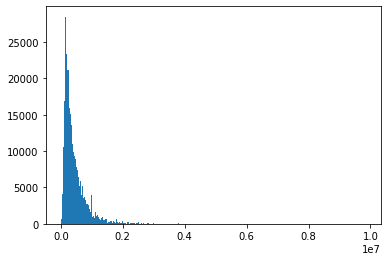

In [24]:
plt.hist(df_full['close_bal'], bins = 1000)
plt.show()

In [25]:
df_full['close_bal'].median()

312988.84

In [49]:
# drop tp-related columns as they indicate prepayment
df = df.drop(['tp', 'tp_vol', 'tp_dflt'], axis = 1)

In [50]:
# sev col is mostly null, drop it
df.sev.isnull().sum()/len(df)

0.9999843370137622

In [54]:
df = df.drop(['sev'], axis = 1)

KeyError: "['sev'] not found in axis"

In [52]:
print('Ratio of Prepayment: ', len(df.loc[df[y_var] == 1]) / len(df[y_var]))

Ratio of Prepayment:  0.02792598567731787


In [53]:
df[['last_month', 'last_year', 'mod_month', 'mod_year']].isnull().any()



last_month    True
last_year     True
mod_month     True
mod_year      True
dtype: bool

In [31]:
# label mod-date as 0 and 1. If it is null, then should be 0

#df[['mod_month', 'mod_year']] = df[['mod_month', 'mod_year']].fillna(0)

In [32]:
# Prepay and modification never happen in the same month
df['mod_month'].loc[df[y_var] == 1].unique()

array([0.])

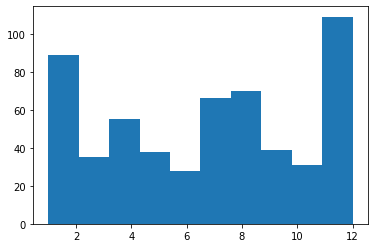

In [33]:
# Months when modifications are likely to happen
plt.hist(df['mod_month'].loc[df['mod_month'] != 0], )
plt.show()

In [55]:
df['month_mod'] = df.apply(lambda row: 1 if (row['mod_month'] != 0) else 0, axis = 1)

In [35]:
# Q: assign mod label to rows before the mod happens? Or not?
#loan_mod = df['loan_id'].loc[df['month_mod'] == 1].unique()
#df['has_been_mod'] = df.apply(lambda row: 1 if (row['loan_id'] in loan_mod) else 0, axis = 1)

In [36]:
# Probability when a modified loan is prepaid.
print('Probability when a modified loan is prepaid: ', len(df.loc[(df['has_been_mod'] == 1) & (df[y_var] == 1)]) / len(df.loc[df[y_var] == 1]))

KeyError: 'has_been_mod'

In [56]:
# we don't need last date since we won't know it until prepayment happen, so drop them
# label mod-date to binary and drop mod_dates

df = df.drop(['last_month', 'last_year', 'mod_month', 'mod_year'], axis = 1)
df.head()

,loan_id,dflt_flag,eb,inv_bal,close_bal,wala,mba,mtl,issuer,svcr,init_rate,mba_prev,mba_prev2,mba_prev6,mba_code,mba_prev_code,mba_apr,last_mba,inv_bal_p1,inv_bal_p2,d30_bal,d60_bal,d90p_bal,dqt_bal,dflt_amt,loss_amt,loss_amt_inact,noloss_dflt_flag,noloss_dflt,sev_bucket,inv_bal_sdq_p1,ltv,cltv,fico_bucket,oltv_bucket,cltv_bucket,olsz_bucket,clsz_bucket,geo,occ_bucket,purp_bucket,iss_bal_atdt,doc_type,covid_flag,ptd_actual,ptd_reported,first_covid_date,pre_covid_ptd,cd_servicer,cd_mstr_servicer,mba_imp,mba_imp_prev,mba_imp_code,mba_imp_prev_code,covid_flag_adj,deal_cpn,covid_flag_adj_prev,ever_covid_before_flag_adj,covid_end_flag,covid_start_flag,covid_restart_flag,is_prepay,MORTGAGE30US,MORTGAGE15US,FEDFUNDS,factor_month,factor_year,close_month,close_year,month_mod
1,AEvnnR,0,612516.01,611809.05,613218.72,6,C,1.0,Arroyo,UNKNOWN,5.375,C,NaN,NaN,1,1.0,0,C,613218.72,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,70.0,66.353530,680-739,60 - 79,60 - 79,600k-1mm,600k-1mm,CA,investor,Purchase,0.0,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,C,1,1.0,0,5.27773,0.0,0,0,0,0,0,4.56,4.06,1.82,6,2018,5,2018,1
2,AEvnnR,0,611100.02,610259.91,613218.72,7,C,1.0,Arroyo,UNKNOWN,5.375,C,C,NaN,1,1.0,0,C,611809.05,613218.72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,70.0,65.921729,680-739,60 - 79,60 - 79,600k-1mm,600k-1mm,CA,investor,Purchase,0.0,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,C,1,1.0,0,5.27773,0.0,0,0,0,0,0,4.55,4.04,1.91,7,2018,5,2018,1
3,AEvnnR,0,609543.95,609546.33,613218.72,8,C,1.0,Arroyo,UNKNOWN,5.375,C,C,NaN,1,1.0,0,C,610259.91,611809.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,70.0,65.710023,680-739,60 - 79,60 - 79,600k-1mm,600k-1mm,CA,investor,Purchase,0.0,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,C,1,1.0,0,5.27773,0.0,0,0,0,0,0,4.60,4.08,1.91,8,2018,5,2018,1
4,AEvnnR,0,608827.17,607987.05,613218.72,9,C,1.0,Arroyo,UNKNOWN,5.375,C,C,NaN,1,1.0,0,C,609546.33,610259.91,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,70.0,65.519354,680-739,60 - 79,60 - 79,600k-1mm,600k-1mm,CA,investor,Purchase,0.0,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,C,1,1.0,0,5.27773,0.0,0,0,0,0,0,4.52,3.97,1.95,9,2018,5,2018,1
5,AEvnnR,0,607260.91,606424.56,613218.72,10,C,1.0,Arroyo,UNKNOWN,5.375,C,C,NaN,1,1.0,0,C,607987.05,609546.33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,70.0,65.329890,680-739,60 - 79,60 - 79,600k-1mm,600k-1mm,CA,investor,Purchase,0.0,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,C,1,1.0,0,5.27773,0.0,0,0,0,0,0,4.71,4.15,2.19,10,2018,5,2018,1


In [ ]:
plt.hist(df['doc_type'].loc[df[y_var] == 1].dropna())
plt.show()

In [ ]:
plt.hist(df['wala'].loc[df[y_var] == 1].dropna())
plt.show()

In [ ]:
plt.hist(df['fico_bucket'].loc[df[y_var] == 1].dropna())
plt.show()

In [ ]:
plt.hist(df['ltv'].loc[df[y_var] == 1].dropna(), bins = len(df['ltv'].unique())//100)
plt.show()

In [ ]:
plt.hist(month_dis, bins = 12)
plt.show()

In [57]:
# Drop derived columns 
# Or not?

# Remove orig-balance-bucket,oltv, olsz buckets, keep closing bal, numerical columns ---- or inverse?
# sev? -- if sev ==0, it is definitely not prepay. mba_imp?
df = df.drop(['dflt_flag', 'mba_code', 'mba_prev_code', 'mba',
            'd30_bal', 'd60_bal', 'd90p_bal', 'dqt_bal','dflt_amt', 
            'loss_amt', 'loss_amt_inact', 'noloss_dflt_flag', 'noloss_dflt', 'sev_bucket', 'oltv_bucket', 
            'cltv_bucket', 'olsz_bucket', 'clsz_bucket', 'inv_bal_sdq_p1', 'iss_bal_atdt', 'mba_imp', 
            'mba_imp_prev', 'mba_imp_code', 'covid_flag_adj', 'covid_flag_adj_prev', 'ever_covid_before_flag_adj', 
            'covid_end_flag', 'covid_start_flag', 'covid_restart_flag', 'mba_imp_prev_code'], axis = 1)

# drop ltv, keep cltv
# df = df.drop('ltv', axis = 1)

df.head()

,loan_id,eb,inv_bal,close_bal,wala,mtl,issuer,svcr,init_rate,mba_prev,mba_prev2,mba_prev6,mba_apr,last_mba,inv_bal_p1,inv_bal_p2,ltv,cltv,fico_bucket,geo,occ_bucket,purp_bucket,doc_type,covid_flag,ptd_actual,ptd_reported,first_covid_date,pre_covid_ptd,cd_servicer,cd_mstr_servicer,deal_cpn,is_prepay,MORTGAGE30US,MORTGAGE15US,FEDFUNDS,factor_month,factor_year,close_month,close_year,month_mod
1,AEvnnR,612516.01,611809.05,613218.72,6,1.0,Arroyo,UNKNOWN,5.375,C,NaN,NaN,0,C,613218.72,NaN,70.0,66.353530,680-739,CA,investor,Purchase,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.27773,0,4.56,4.06,1.82,6,2018,5,2018,1
2,AEvnnR,611100.02,610259.91,613218.72,7,1.0,Arroyo,UNKNOWN,5.375,C,C,NaN,0,C,611809.05,613218.72,70.0,65.921729,680-739,CA,investor,Purchase,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.27773,0,4.55,4.04,1.91,7,2018,5,2018,1
3,AEvnnR,609543.95,609546.33,613218.72,8,1.0,Arroyo,UNKNOWN,5.375,C,C,NaN,0,C,610259.91,611809.05,70.0,65.710023,680-739,CA,investor,Purchase,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.27773,0,4.60,4.08,1.91,8,2018,5,2018,1
4,AEvnnR,608827.17,607987.05,613218.72,9,1.0,Arroyo,UNKNOWN,5.375,C,C,NaN,0,C,609546.33,610259.91,70.0,65.519354,680-739,CA,investor,Purchase,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.27773,0,4.52,3.97,1.95,9,2018,5,2018,1
5,AEvnnR,607260.91,606424.56,613218.72,10,1.0,Arroyo,UNKNOWN,5.375,C,C,NaN,0,C,607987.05,609546.33,70.0,65.329890,680-739,CA,investor,Purchase,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.27773,0,4.71,4.15,2.19,10,2018,5,2018,1


In [59]:
# remove year, since it will not tell anything
df = df.drop(['factor_year', 'close_year'], axis = 1)

In [61]:
df['ptd_actual'].isnull().sum()/len(df)

0.637753166999878

In [62]:
# Remove ptd dates?
df = df.drop(['ptd_actual', 'ptd_reported'], axis = 1)

In [65]:
df.loc[~df['first_covid_date'].isna()]

,loan_id,eb,inv_bal,close_bal,wala,mtl,issuer,svcr,init_rate,mba_prev,mba_prev2,mba_prev6,mba_apr,last_mba,inv_bal_p1,inv_bal_p2,ltv,cltv,fico_bucket,geo,occ_bucket,purp_bucket,doc_type,covid_flag,first_covid_date,pre_covid_ptd,cd_servicer,cd_mstr_servicer,deal_cpn,is_prepay,MORTGAGE30US,MORTGAGE15US,FEDFUNDS,factor_month,close_month,month_mod
1715,AiknLQ,273739.57,318945.82,448672.87,35,1.0,Arroyo,UNKNOWN,5.50,C,C,C,C,C,275440.99,421724.03,60.0,32.109382,740+,NY/NJ,owner,Purchase,Other,Y,2020-10-01,2020-09-01,UNKNOWN,Nationstar,5.277730,0,2.88,2.36,0.09,10,5,1
1716,AiknLQ,317443.80,317443.80,448672.87,36,1.0,Arroyo,UNKNOWN,5.50,C,C,C,C,C,318945.82,275440.99,60.0,31.651818,740+,NY/NJ,owner,Purchase,Other,N,2020-10-01,2020-09-01,UNKNOWN,Nationstar,5.277730,0,2.81,2.32,0.09,11,5,1
1717,AiknLQ,315934.89,0.00,448672.87,37,1.0,Arroyo,UNKNOWN,5.50,C,C,C,C,C,317443.80,318945.82,60.0,0.000000,740+,NY/NJ,owner,Purchase,Other,N,2020-10-01,2020-09-01,UNKNOWN,Nationstar,5.277730,1,2.71,2.26,0.09,12,5,1
3964,BJcBmY,325158.16,332062.46,336831.80,31,1.0,Arroyo,UNKNOWN,5.25,6,3,C,C,C,325600.11,326040.13,65.0,57.462840,620-679,CA,owner,Purchase,Other,Y,2020-08-01,2020-04-01,UNKNOWN,Nationstar,5.277730,0,2.99,2.51,0.10,8,5,1
3965,BJcBmY,331609.15,331609.15,336831.80,32,1.0,Arroyo,UNKNOWN,5.25,C,6,C,C,C,332062.46,325600.11,65.0,56.734432,620-679,CA,owner,Purchase,Other,N,2020-08-01,2020-04-01,UNKNOWN,Nationstar,5.277730,0,2.93,2.42,0.09,9,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007899,SNsHwg,1559600.00,1559600.00,1559600.00,21,NaN,Verus,UNKNOWN,6.25,C,C,C,C,NaN,1559600.00,1559600.00,70.0,61.117225,740+,CA,investor,Cash Out,Investor,N,2020-10-01,2020-11-01,UNKNOWN,unknown,7.113689,0,2.73,2.21,0.08,2,7,1
1007900,SNsHwg,1559600.00,1559600.00,1559600.00,22,NaN,Verus,UNKNOWN,6.25,C,C,C,C,NaN,1559600.00,1559600.00,70.0,60.228802,740+,CA,investor,Cash Out,Investor,N,2020-10-01,2020-11-01,UNKNOWN,unknown,7.113689,0,3.02,2.34,0.07,3,7,1
1007901,SNsHwg,1559600.00,1559600.00,1559600.00,23,NaN,Verus,UNKNOWN,6.25,3,C,C,C,NaN,1559600.00,1559600.00,70.0,59.162385,740+,CA,investor,Cash Out,Investor,N,2020-10-01,2020-11-01,UNKNOWN,unknown,7.113689,0,3.18,2.45,0.07,4,7,1
1007902,SNsHwg,1559600.00,1559600.00,1559600.00,24,NaN,Verus,UNKNOWN,6.25,C,3,C,C,NaN,1559600.00,1559600.00,70.0,57.762785,740+,CA,investor,Cash Out,Investor,N,2020-10-01,2020-11-01,UNKNOWN,unknown,7.113689,0,2.98,2.31,0.06,5,7,1


In [ ]:


# Remove covid dates
df = df.drop(['first_covid_date', 'pre_covid_ptd'], axis = 1)

# Remove year
df = df.drop(list(df.filter(regex='year')), axis = 1)

# Remove mba_apr, last_mba --- what is mba_apr?
df = df.drop(['mba_apr', 'last_mba'], axis = 1)

# drop loan_id
df = df.drop('loan_id', axis = 1)

df = df.drop('inv_bal', axis = 1)

In [ ]:
df.reset_index(drop=True, inplace= True)

In [ ]:
print(df.shape)
df.head()

In [ ]:
fico_bucket_mapper = {'000 - 600': 1, '620-679':2, '680-739':3, '740+':4}
df['fico_bucket'] = df['fico_bucket'].replace(fico_bucket_mapper)

In [ ]:
df = df.drop(['inv_bal_p1', 'inv_bal_p2'], axis = 1)

In [ ]:
df = df.drop('deal_cpn', axis = 1)

In [ ]:
na_column = [(i, df[i].isnull().sum(), df[i].isnull().sum()/ len(df)) for i in df.columns if df[i].isnull().values.any()]
na_column

In [ ]:
df.cd_servicer.unique()

In [ ]:
df.covid_flag.unique()

In [ ]:
df.doc_type.unique()

In [ ]:
df.covid_flag.fillna('N', inplace=True)
df.cd_servicer.fillna('UNKNOWN', inplace=True)
df.cd_mstr_servicer.fillna('unknown', inplace=True)
df.doc_type.fillna('Other', inplace=True)
df.dropna(subset = ['fico_bucket'], inplace=True)
# since mtl has so many nulls, drop the whole column
df = df.drop('mtl', axis = 1)


In [ ]:
df[['mba_prev2', 'mba_prev6']] = df[['mba_prev2', 'mba_prev6']].fillna(-1)

In [ ]:
na_column = [(i, df[i].isnull().sum(), df[i].isnull().sum()/ len(df)) for i in df.columns if df[i].isnull().values.any()]
na_column

In [ ]:
df.head()

In [ ]:
df_full.loc[df_full['loan_id'] == 'OGuSfQ'].sort_values(by = 'factor_date')

In [ ]:
plt.hist(df.fico_bucket)
plt.xticks()
plt.show()

In [ ]:
df.shape

issuer


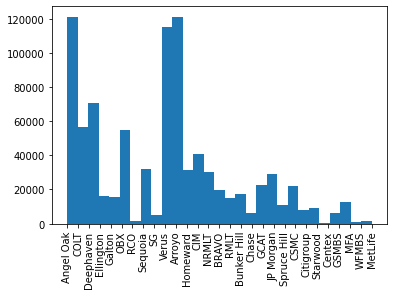

svcr


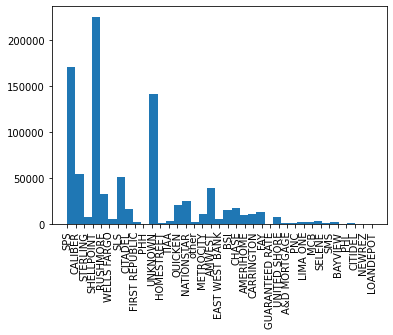

mba_prev


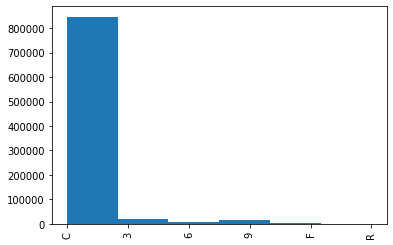

mba_prev2


TypeError: 'value' must be an instance of str or bytes, not a float

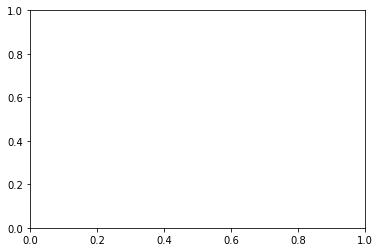

In [39]:
nominal_variables = ['issuer', 'svcr', 'mba_prev', 'mba_prev2', 'mba_prev6', 'occ_bucket', 'purp_bucket', 'doc_type', 
                     'geo', 'cd_servicer', 'cd_mstr_servicer', 'covid_flag']

for i in nominal_variables:
    print(i)
    plt.hist(df[i], bins = len(df[i].unique()))
    plt.xticks(rotation = 90)
    plt.show()

In [ ]:
df.reset_index(drop = True, inplace=True)

In [40]:
df.head()

,loan_id,dflt_flag,eb,inv_bal,close_bal,wala,mba,mtl,issuer,svcr,init_rate,mba_prev,mba_prev2,mba_prev6,mba_code,mba_prev_code,mba_apr,last_mba,inv_bal_p1,inv_bal_p2,d30_bal,d60_bal,d90p_bal,dqt_bal,dflt_amt,loss_amt,loss_amt_inact,noloss_dflt_flag,noloss_dflt,sev_bucket,inv_bal_sdq_p1,ltv,cltv,fico_bucket,oltv_bucket,cltv_bucket,olsz_bucket,clsz_bucket,geo,occ_bucket,purp_bucket,iss_bal_atdt,doc_type,covid_flag,ptd_actual,ptd_reported,first_covid_date,pre_covid_ptd,cd_servicer,cd_mstr_servicer,mba_imp,mba_imp_prev,mba_imp_code,mba_imp_prev_code,covid_flag_adj,deal_cpn,covid_flag_adj_prev,ever_covid_before_flag_adj,covid_end_flag,covid_start_flag,covid_restart_flag,is_prepay,FEDFUNDS,factor_month,factor_year,last_month,last_year,close_month,close_year,mod_month,mod_year,month_mod
4648,wOBhtR,0,106206.16,106205.68,107788.78,24,C,1.0,Angel Oak,SPS,8.500,C,C,C,1,1.0,0,C,106283.13,106361.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.00,0,0.0,80.00,67.752998,620-679,80 - 99,80 - 99,<400k,<400k,FL,owner,Purchase,0.0,Full,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,C,1,1.0,0,6.898418,0.0,0,0,0,0,0,1.7,5,2018,10.0,2019.0,8,2016,0.0,0.0,0
4649,iIEtrJ,0,310560.79,310560.79,314294.27,18,C,1.0,Angel Oak,SPS,7.500,C,C,C,1,1.0,C,C,310820.69,311078.98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.00,0,0.0,90.00,84.159875,620-679,80 - 99,80 - 99,<400k,<400k,TX,owner,Purchase,0.0,Full,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,C,1,1.0,0,6.964812,0.0,0,0,0,0,0,1.7,5,2018,6.0,2020.0,3,2017,0.0,0.0,0
4650,qvNcuS,0,189472.92,189472.92,192434.36,18,C,7.0,Angel Oak,SPS,6.125,C,C,C,1,1.0,C,9,189677.46,189880.97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,182826.25,0,0.0,64.77,63.424591,680-739,60 - 79,60 - 79,<400k,<400k,FL,owner,Purchase,0.0,Full,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,C,1,1.0,0,6.964812,0.0,0,0,0,0,0,1.7,5,2018,12.0,2020.0,3,2017,0.0,0.0,0
4651,CXhphj,0,561683.98,561683.98,566489.27,12,C,1.0,Angel Oak,SPS,7.500,C,C,C,1,1.0,0,C,562134.56,562582.34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.00,0,0.0,90.00,82.679477,680-739,80 - 99,80 - 99,400-600k,400-600k,CA,owner,Purchase,0.0,BankSt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,C,1,1.0,0,6.866914,0.0,0,0,0,0,0,1.7,5,2018,9.0,2018.0,7,2017,0.0,0.0,0
4652,OGuSfQ,0,335518.04,335497.02,338847.57,15,C,1.0,Angel Oak,SPS,6.875,C,C,C,1,1.0,0,C,335827.59,336156.27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.00,0,0.0,85.00,75.442125,680-739,80 - 99,80 - 99,<400k,<400k,FL,owner,Refi,0.0,Full,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,C,1,1.0,0,6.866914,0.0,0,0,0,0,0,1.7,5,2018,6.0,2018.0,7,2017,0.0,0.0,0


In [41]:
y = df[y_var]
X = df.drop(y_var, axis = 1)
X.reset_index(drop=True, inplace=True)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import targetencoding

# For unique counts < 5, do one-hot-encoding; otherwise, use target encoding

nominal_below5 = [i for i in nominal_variables if len(X[i].unique()) <= 5]

onehotenc = OneHotEncoder()

onehotencoded_df = pd.DataFrame(onehotenc.fit_transform(X[nominal_below5]).toarray())
onehotencoded_df.columns = onehotenc.get_feature_names(nominal_below5)

X = X.join(onehotencoded_df)
X.drop(nominal_below5, axis = 1, inplace=True)

X.head()


In [40]:
df_full['doc_type'].unique()

array(['Other', 'Full', 'Investor', 'BankSt', nan, 'Foreign'],
      dtype=object)

In [ ]:
X.head()

In [43]:
nominal_below5

['occ_bucket', 'purp_bucket', 'doc_type', 'cd_mstr_servicer', 'covid_flag']

In [44]:
df['mba_prev'].unique()

array(['C', '6', '9', '3', 'F', 'R'], dtype=object)

In [45]:
# drop one column from each dummy columns to reduce multicollinearity

X = X.drop(['cd_mstr_servicer_unknown', 'covid_flag_N', 'doc_type_Other', 'occ_bucket_Other', 'purp_bucket_Purchase'], axis = 1)

In [46]:
# For nominal data with unique > 5, use target encoding.
nominal_else = [i for i in nominal_variables if i not in nominal_below5]
encoder  = targetencoding.TargetEncoder(cols = nominal_else)
X = encoder.fit(X, y).transform(X)
X.head()

,eb,close_bal,wala,issuer,svcr,init_rate,mba_prev,mba_prev2,mba_prev6,ltv,cltv,fico_bucket,geo,cd_servicer,FEDFUNDS,factor_month,close_month,month_mod,occ_bucket_investor,occ_bucket_owner,purp_bucket_Cash Out,purp_bucket_Refi,doc_type_BankSt,doc_type_Foreign,doc_type_Full,doc_type_Investor,cd_mstr_servicer_Nationstar,cd_mstr_servicer_SPS,cd_mstr_servicer_Wells Fargo,covid_flag_Y
0,106206.16,107788.78,24,0.029327,0.029965,8.500,0.029148,0.029996,0.031888,80.00,67.752998,2.0,0.024654,0.027853,1.7,5,8,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,310560.79,314294.27,18,0.029327,0.029965,7.500,0.029148,0.029996,0.031888,90.00,84.159875,2.0,0.023515,0.027853,1.7,5,3,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,189472.92,192434.36,18,0.029327,0.029965,6.125,0.029148,0.029996,0.031888,64.77,63.424591,3.0,0.024654,0.027853,1.7,5,3,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,561683.98,566489.27,12,0.029327,0.029965,7.500,0.029148,0.029996,0.031888,90.00,82.679477,3.0,0.031530,0.027853,1.7,5,7,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,335518.04,338847.57,15,0.029327,0.029965,6.875,0.029148,0.029996,0.031888,85.00,75.442125,3.0,0.024654,0.027853,1.7,5,7,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [47]:
# If df contains only numerical values
X.apply(lambda s: pd.to_numeric(s, errors='coerce').notnull().all())

eb                               True
close_bal                        True
wala                             True
issuer                           True
svcr                             True
init_rate                        True
mba_prev                         True
mba_prev2                        True
mba_prev6                        True
ltv                              True
cltv                            False
fico_bucket                      True
geo                              True
cd_servicer                      True
FEDFUNDS                         True
factor_month                     True
close_month                      True
month_mod                        True
occ_bucket_investor              True
occ_bucket_owner                 True
purp_bucket_Cash Out             True
purp_bucket_Refi                 True
doc_type_BankSt                  True
doc_type_Foreign                 True
doc_type_Full                    True
doc_type_Investor                True
cd_mstr_serv

In [54]:
X = X.dropna(subset=['cltv'])

In [55]:
X.apply(lambda s: pd.to_numeric(s, errors='coerce').notnull().all())

eb                              True
close_bal                       True
wala                            True
issuer                          True
svcr                            True
init_rate                       True
mba_prev                        True
mba_prev2                       True
mba_prev6                       True
ltv                             True
cltv                            True
fico_bucket                     True
geo                             True
cd_servicer                     True
FEDFUNDS                        True
factor_month                    True
close_month                     True
month_mod                       True
occ_bucket_investor             True
occ_bucket_owner                True
purp_bucket_Cash Out            True
purp_bucket_Refi                True
doc_type_BankSt                 True
doc_type_Foreign                True
doc_type_Full                   True
doc_type_Investor               True
cd_mstr_servicer_Nationstar     True
c

<AxesSubplot:>

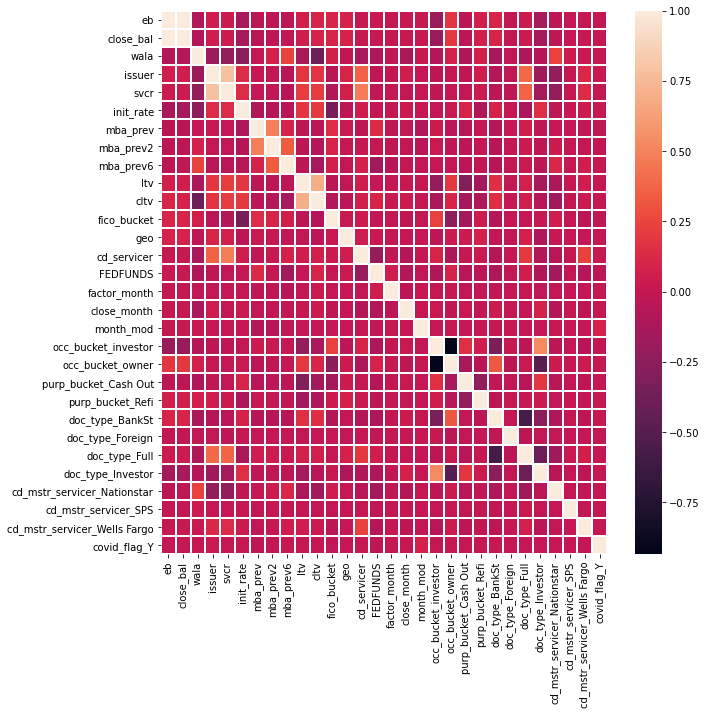

In [56]:
corr = X.corr()
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(corr, linewidths=.3)

In [62]:
# Remove high correlated columns
X.drop(['eb','occ_bucket_owner'], axis = 1, inplace=True)

In [63]:
X.drop(['svcr'], axis = 1, inplace=True)

<AxesSubplot:>

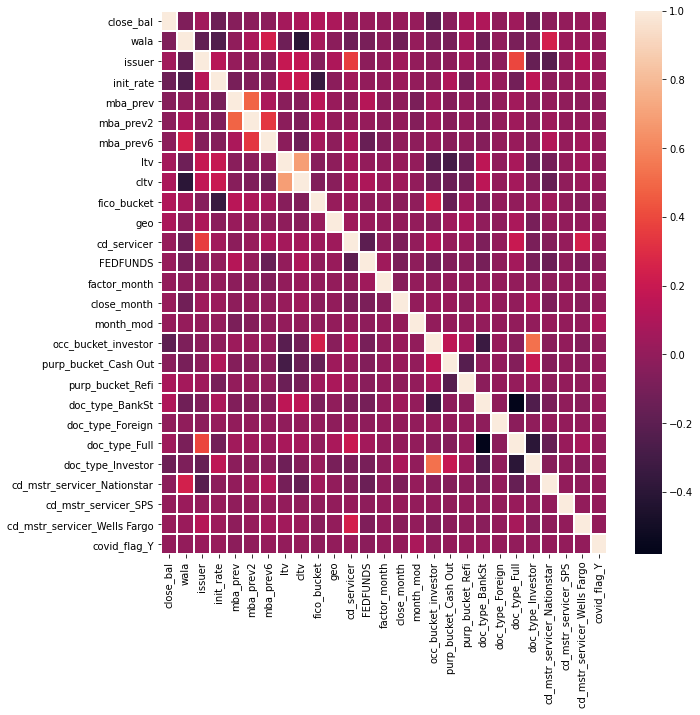

In [66]:
corr = X.corr()
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(corr, linewidths=.3)

Random shuffle and save data

In [67]:
df_cleaned = X.copy()
df_cleaned[y_var] = y
df_cleaned = df_cleaned.sample(frac = 1).reset_index(drop = True)

import pickle
pickle.dump(df_cleaned, open( "data_cleaned.pkl", "wb" ) )


In [421]:
X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape

((328426, 30), (328426, 30), (328426, 30), (328426,), (328426,), (328426,))

In [422]:
df_train = X_train.join(y_train).sample(frac=1).reset_index(drop=True)
df_test = X_test.join(y_test).sample(frac=1).reset_index(drop=True)
df_val = X_val.join(y_val).sample(frac=1).reset_index(drop=True)

In [423]:
import pickle
pickle.dump(df_train, open( "prepay_train.pkl", "wb" ) )
pickle.dump(df_test, open( "prepay_test.pkl", "wb" ) )
pickle.dump(df_val, open( "prepay_val.pkl", "wb" ) )

In [62]:
import pickle
y_var = 'is_prepay'
df_train = pickle.load( open( "prepay_train.pkl", "rb" ) )
y_train = df_train[y_var]
X_train = df_train.drop(y_var, axis = 1)

df_val = pickle.load( open( "prepay_val.pkl", "rb" ) )
y_val = df_val[y_var]
X_val = df_val.drop(y_var, axis = 1)

df_test = pickle.load( open( "prepay_test.pkl", "rb" ) )
y_test = df_test[y_var]
X_test = df_test.drop(y_var, axis = 1)

### Start with doc_type, fico, wala, cltv and some basic un-tuned models

In [24]:
# LR with doc_type
doc_Type = [i for i in X_train.columns if 'doc' in i]
lr_doc = LogisticRegression()
lr_doc.fit(X_train[doc_Type], y_train)
print('lr_doc: ',  lr_doc.score(X_test[doc_Type], y_test))

lr_fico = LogisticRegression()
lr_fico.fit(np.reshape(X_train['fico_bucket'].values,(-1,1)), y_train)
print('lr_fico: ',  lr_fico.score(np.reshape(X_test['fico_bucket'].values,(-1,1)), y_test))

lr_wala = LogisticRegression()
lr_wala.fit(np.reshape(X_train['wala'].values,(-1,1)), y_train)
print('lr_wala: ',  lr_wala.score(np.reshape(X_test['wala'].values,(-1,1)), y_test))

lr_ltv = LogisticRegression()
lr_ltv.fit(np.reshape(X_train['ltv'].values,(-1,1)), y_train)
print('lr_ltv: ',  lr_ltv.score(np.reshape(X_test['ltv'].values,(-1,1)), y_test))

lr_doc:  0.9738784383696784
lr_fico:  0.9738784383696784
lr_wala:  0.9738784383696784
lr_ltv:  0.9738784383696784


Clearly, it is overfitting.

doc_type


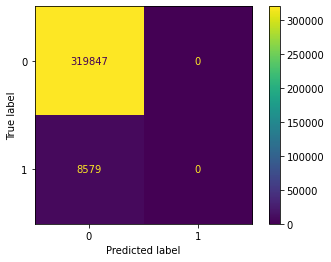

fico_bucket


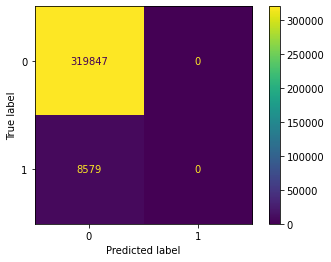

wala


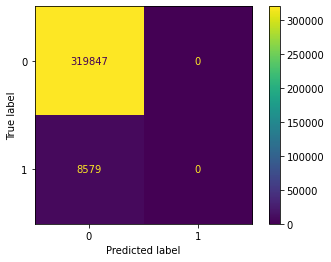

ltv


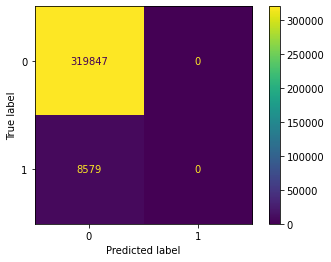

In [469]:
orig_features = [lr_doc,lr_fico, lr_wala,lr_ltv]
orig_names = ['doc_type', 'fico_bucket', 'wala', 'ltv']
for i in zip(orig_features, orig_names):
    
    if i[1] == 'doc_type':
        print(i[1])
        plot_confusion_matrix(i[0], X_test[doc_Type], y_test)
        plt.show()
    else:
        print(i[1])
        plot_confusion_matrix(i[0], np.reshape(X_test[i[1]].values,(-1,1)), y_test)
        plt.show()

Use SMOTE-TOMEK to resample the training data

In [25]:
# Resample a fraction of the training set to get a 1:0 ratio of 1/4
from imblearn.combine import SMOTETomek
from collections import Counter

df_train_frac = df_train.sample(frac=0.2)
X_train_frac = df_train_frac.drop(y_var, axis = 1)
y_train_frac = df_train_frac[y_var]
counter = Counter(y_train_frac)
print('Before', counter)
smtom = SMOTETomek(sampling_strategy=0.25, random_state = 8, n_jobs=-1)
X_train_smtom_frac, y_train_smtom_frac = smtom.fit_resample(X_train_frac, y_train_frac)
counter = Counter(y_train_smtom_frac)
print("After", counter)

Before Counter({0: 64011, 1: 1674})
After Counter({0: 59464, 1: 11455})


In [725]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy=0.5)
X_train_frac_under, y_train_frac_under = undersample.fit_resample(X_train_frac,y_train_frac)

In [35]:
doc_Type = [i for i in X_train.columns if 'doc' in i]
lr_doc = LogisticRegression(class_weight='balanced')
lr_doc.fit(X_train_smtom_frac[doc_Type], y_train_smtom_frac)
print('lr_doc: ',  lr_doc.score(X_test[doc_Type], y_test))

lr_fico = LogisticRegression(class_weight='balanced')
lr_fico.fit(np.reshape(X_train_smtom_frac['fico_bucket'].values,(-1,1)), y_train_smtom_frac)
print('lr_fico: ',  lr_fico.score(np.reshape(X_test['fico_bucket'].values,(-1,1)), y_test))

lr_wala = LogisticRegression(class_weight='balanced')
lr_wala.fit(np.reshape(X_train_smtom_frac['wala'].values,(-1,1)), y_train_smtom_frac)
print('lr_wala: ',  lr_wala.score(np.reshape(X_test['wala'].values,(-1,1)), y_test))

lr_ltv = LogisticRegression(class_weight='balanced')
lr_ltv.fit(np.reshape(X_train_smtom_frac['ltv'].values,(-1,1)), y_train_smtom_frac)
print('lr_ltv: ',  lr_ltv.score(np.reshape(X_test['ltv'].values,(-1,1)), y_test))

lr_doc:  0.5516219787714737
lr_fico:  0.40678265423565735
lr_wala:  0.33824666743802256
lr_ltv:  0.43027044143886295


In [36]:
for i in zip(doc_Type, lr_doc.coef_[0]):
    print(i[0], i[1])

doc_type_BankSt 0.2633940011570649
doc_type_Foreign -0.923317465010904
doc_type_Full 0.5150517380435218
doc_type_Investor -0.15459321615171817
doc_type_Other 0.008064429904349146


In [37]:
lr_doc.intercept_

array([-0.29656313])

In [38]:
p = np.exp(lr_doc.intercept_[0]) / (np.exp(lr_doc.intercept_[0]) + 1)
p

0.4263978694435707

In [39]:
np.bincount(y_train_smtom_frac)[1]/np.bincount(y_train_smtom_frac)[0]

0.19263756222252118

In [34]:
lr_doc.predict_proba(X_test[doc_Type])

array([[0.59629923, 0.40370077],
       [0.50110431, 0.49889569],
       [0.45289875, 0.54710125],
       ...,
       [0.45289875, 0.54710125],
       [0.50110431, 0.49889569],
       [0.50110431, 0.49889569]])

doc_type


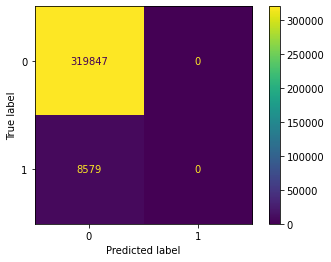

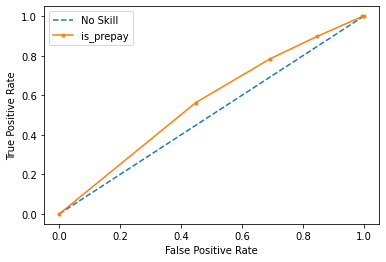

is_prepay AUC score:  0.5660095189694587

fico_bucket


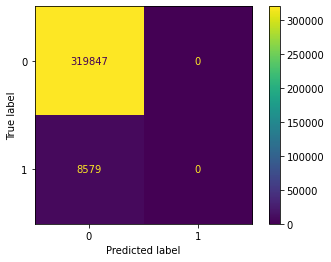

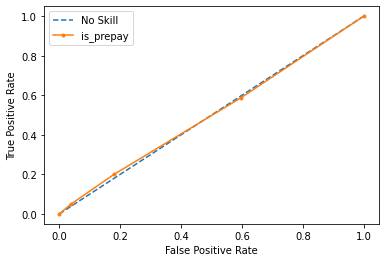

is_prepay AUC score:  0.5028616369359193

wala


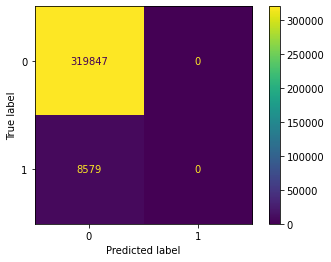

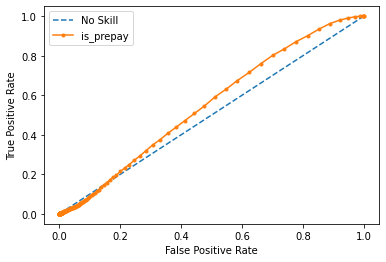

is_prepay AUC score:  0.5524494200689692

ltv


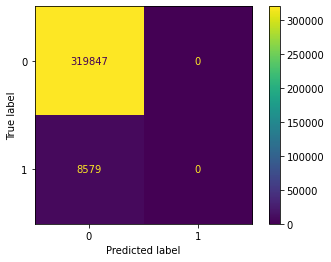

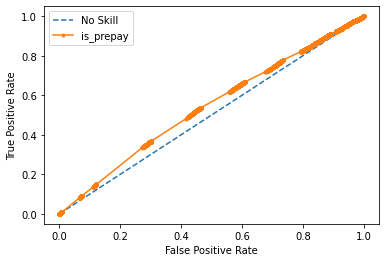

is_prepay AUC score:  0.5411014319870133



In [640]:
orig_features = [lr_doc,lr_fico, lr_wala,lr_ltv]
orig_names = ['doc_type', 'fico_bucket', 'wala', 'ltv']
for i in zip(orig_features, orig_names):
    
    if i[1] == 'doc_type':
        print(i[1])
        plot_confusion_matrix(i[0], X_test[doc_Type], y_test)
        plt.show()
        plot_roc(i[0], X_test[doc_Type], y_test, y_var)
        plt.show()
        print()
    else:
        print(i[1])
        plot_confusion_matrix(i[0], np.reshape(X_test[i[1]].values,(-1,1)), y_test)
        plt.show()
        plot_roc(i[0], np.reshape(X_test[i[1]].values,(-1,1)), y_test,y_var)
        plt.show()
        print()

In [731]:
yhat = lr_doc.predict_proba(X_test[doc_Type])
model_probs = yhat[:, 1]
# calculate the precision-recall auc
precision, recall, _ = precision_recall_curve(y_test, model_probs)
auc_score = auc(recall, precision)
print('RF PR AUC: %.3f' % auc_score)

RF PR AUC: 0.304


Combine four features

In [13]:
# Get columns
orig_names.extend(doc_Type)
orig_names.remove('doc_type')

NameError: name 'orig_names' is not defined

In [12]:
lr_orig = LogisticRegression()
lr_orig.fit(X_train_smtom_frac[orig_names], y_train_smtom_frac)
lr_orig.score(X_test[orig_names], y_test)

NameError: name 'orig_names' is not defined

In [11]:
lr_orig.coef_

NameError: name 'lr_orig' is not defined

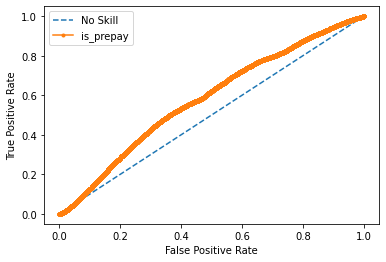

is_prepay AUC score:  0.5824960629734709


In [645]:
plot_roc(lr_orig,X_test[orig_names], y_test, y_var)

RF PR AUC: 0.032


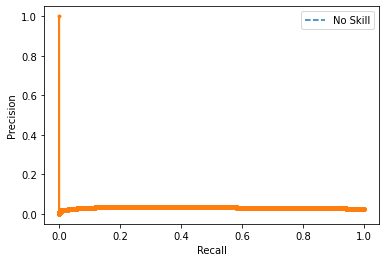

In [646]:
yhat = lr_orig.predict_proba(X_test[orig_names])
model_probs = yhat[:, 1]
# calculate the precision-recall auc
precision, recall, _ = precision_recall_curve(y_test, model_probs)
auc_score = auc(recall, precision)
print('RF PR AUC: %.3f' % auc_score)
plot_pr_curve(y_test, model_probs)

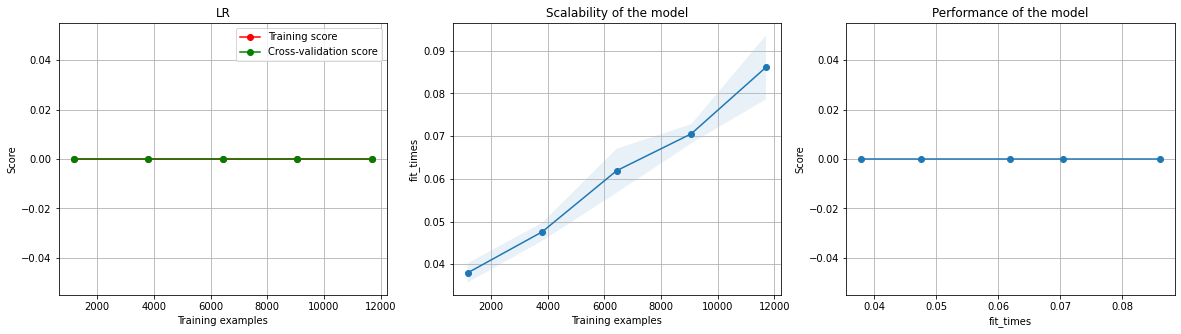

In [699]:
plot_learning_curve2(LogisticRegression(), 'LR', X_train_smtom_frac[orig_names].iloc[:len(X_train_smtom_frac)//5], y_train_smtom_frac.iloc[:len(y_train_smtom_frac)//5], scoring = 'recall')
plt.show()

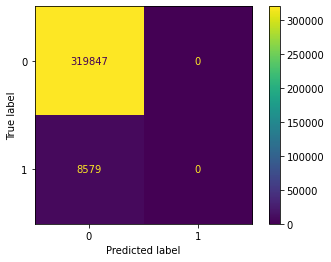

In [656]:
plot_confusion_matrix(lr_orig, X_test[orig_names], y_test)

Above we got a slightly better AUC score, but still no precision.

Random Forest

In [669]:
rf_orig = RandomForestClassifier()
rf_orig.fit(X_train_smtom_frac[orig_names], y_train_smtom_frac)
rf_orig.score(X_test[orig_names], y_test)

0.9596986840262343

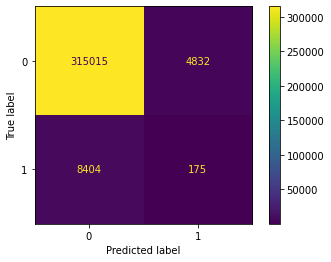

In [670]:
plot_confusion_matrix(rf_orig, X_test[orig_names], y_test)

In [671]:
cross_val_score(RandomForestClassifier(), X_train_smtom_frac[orig_names], y_train_smtom_frac, cv = 8, scoring='recall').mean()

0.8257786112028722

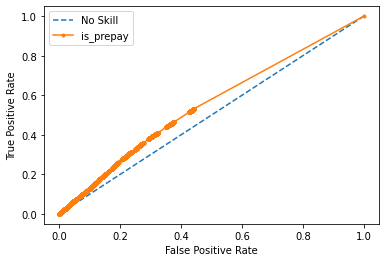

is_prepay AUC score:  0.5516636388713556


In [672]:
plot_roc(rf_orig,X_test[orig_names], y_test, y_var)

In [673]:
def plot_pr_curve(test_y, model_probs):
    # calculate the no skill line as the proportion of the positive class
    no_skill = len(test_y[test_y==1]) / len(test_y)
    # plot the no skill precision-recall curve
    plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
    # plot model precision-recall curve
    precision, recall, _ = precision_recall_curve(test_y, model_probs)
    plt.plot(recall, precision, marker='.')
    # axis labels
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()

RF PR AUC: 0.031


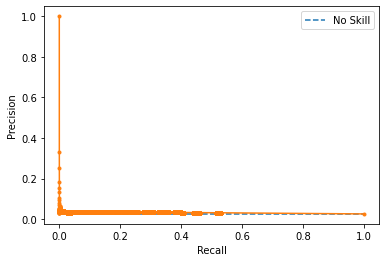

In [674]:
yhat = rf_orig.predict_proba(X_test[orig_names])
model_probs = yhat[:, 1]
# calculate the precision-recall auc
precision, recall, _ = precision_recall_curve(y_test, model_probs)
auc_score = auc(recall, precision)
print('RF PR AUC: %.3f' % auc_score)
plot_pr_curve(y_test, model_probs)

The following rf model performs well, but that could be because the resample method is the same, causing information leakage.

<module 'matplotlib.pyplot' from 'c:\\users\\scui\\appdata\\local\\programs\\python\\python39\\lib\\site-packages\\matplotlib\\pyplot.py'>

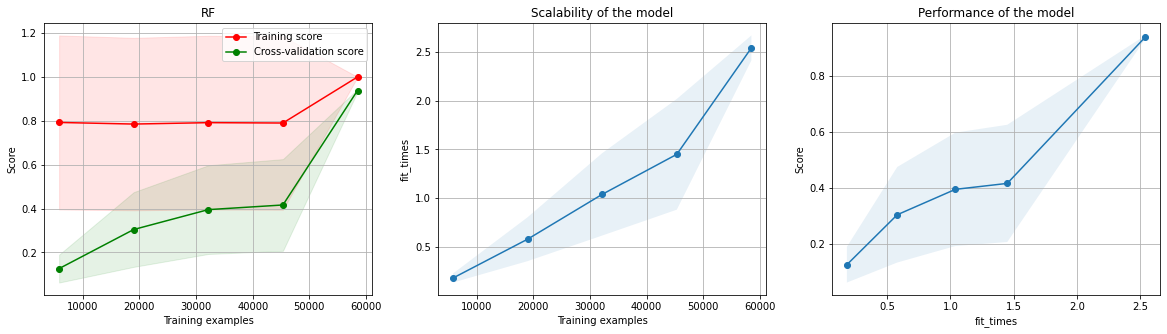

In [675]:
plot_learning_curve2(RandomForestClassifier(), 'RF', X_train_smtom_frac[orig_names], y_train_smtom_frac, scoring = 'precision')

### Add other columns 

In [595]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9737505556807318

Very bad recall, imbalanced data

In [599]:
print(cross_val_score(RandomForestClassifier(), X_train, y_train, cv=10, scoring = 'recall'))

[0.0260355  0.03664303 0.02600473 0.02245863 0.0248227  0.03427896
 0.02721893 0.02721893 0.02366864 0.03431953]


In [600]:
X_train.head()

,wala,mtl,issuer,init_rate,mba_prev,mba_prev2,inv_bal_p1,ltv,fico_bucket,geo,cd_servicer,deal_cpn,factor_month,close_month,month_mod,has_been_mod,factor_month_is_janordec,occ_bucket_Other,occ_bucket_investor,purp_bucket_Cash Out,purp_bucket_Refi,doc_type_BankSt,doc_type_Foreign,doc_type_Full,doc_type_Investor,doc_type_Other,cd_mstr_servicer_Nationstar,cd_mstr_servicer_SPS,cd_mstr_servicer_Wells Fargo,covid_flag_Y
0,51,1.175411,0.025076,8.625,0.026251,0.026289,124673.71,70.00,1.0,0.021609,0.024338,5.594596,7,2,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,71,1.175411,0.018486,3.875,0.026251,0.026289,269350.58,41.10,3.0,0.028287,0.012605,5.347266,3,2,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,70,1.000000,0.018486,5.250,0.026251,0.026289,94622.48,60.00,3.0,0.028035,0.024338,5.277730,11,5,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,16,1.000000,0.021519,5.500,0.026251,0.026289,94074.81,64.98,4.0,0.028035,0.018911,5.851862,8,9,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,18,1.000000,0.027060,4.750,0.026251,0.026289,517499.95,90.00,4.0,0.028035,0.024338,6.568932,1,8,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


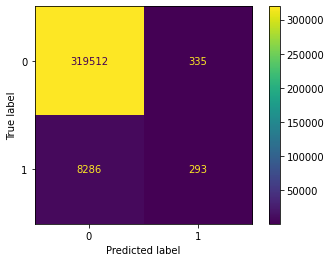

In [601]:
plot_confusion_matrix(rf, X_test, y_test)

Select important features that are >0.0001

In [602]:
importance = [round_sig(i) for i in rf.feature_importances_]
feature_importance = list(zip(X_train.columns,importance))
sorted(feature_importance, key = lambda x: x[1])

[('month_mod', 1.81e-05),
 ('covid_flag_Y', 7.39e-05),
 ('cd_mstr_servicer_SPS', 7.45e-05),
 ('doc_type_Foreign', 0.000189),
 ('has_been_mod', 0.000818),
 ('cd_mstr_servicer_Wells Fargo', 0.000889),
 ('doc_type_Other', 0.00154),
 ('cd_mstr_servicer_Nationstar', 0.00177),
 ('doc_type_Investor', 0.00204),
 ('mba_prev', 0.00394),
 ('mba_prev2', 0.00415),
 ('doc_type_Full', 0.00454),
 ('doc_type_BankSt', 0.00456),
 ('occ_bucket_Other', 0.00565),
 ('occ_bucket_investor', 0.00829),
 ('purp_bucket_Refi', 0.00958),
 ('factor_month_is_janordec', 0.0133),
 ('purp_bucket_Cash Out', 0.0147),
 ('cd_servicer', 0.0229),
 ('fico_bucket', 0.0317),
 ('issuer', 0.0362),
 ('close_month', 0.0408),
 ('geo', 0.0419),
 ('mtl', 0.0442),
 ('deal_cpn', 0.0621),
 ('ltv', 0.0967),
 ('factor_month', 0.0979),
 ('init_rate', 0.101),
 ('wala', 0.146),
 ('inv_bal_p1', 0.202)]

In [735]:
important_features = [i[0] for i in feature_importance if i[1] >= 0.0001]
X_train, X_test = X_train[important_features], X_test[important_features]
X_train_frac = X_train_frac[important_features]
X_train_smtom_frac = X_train_smtom_frac[important_features]

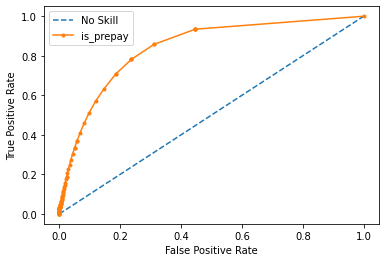

is_prepay AUC score:  0.8397024019249897


In [603]:
plot_roc(rf,X_test, y_test, y_var)

<module 'matplotlib.pyplot' from 'c:\\users\\scui\\appdata\\local\\programs\\python\\python39\\lib\\site-packages\\matplotlib\\pyplot.py'>

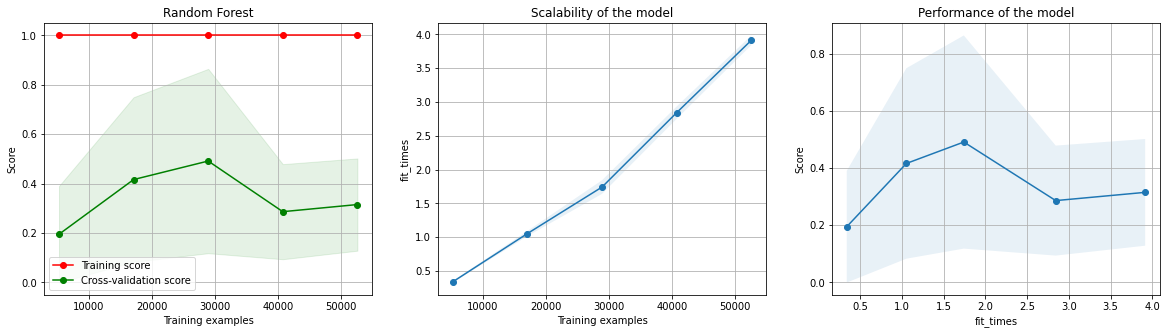

In [676]:
plot_learning_curve2(RandomForestClassifier(), 'Random Forest', X_train_frac, y_train_frac, scoring = 'precision')

Again, pretty bad. Although roc is better, the precision still doesn't improve when training size increases.

In [707]:
rf_resample = RandomForestClassifier()
rf_resample.fit(X_train_smtom_frac, y_train_smtom_frac)

RandomForestClassifier()

RF PR AUC: 0.088


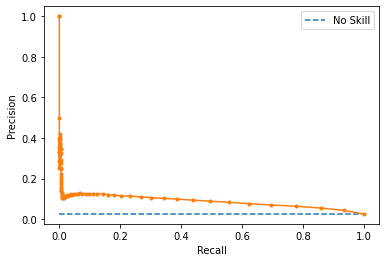

In [708]:
yhat = rf_resample.predict_proba(X_test)
model_probs = yhat[:, 1]
# calculate the precision-recall auc
precision, recall, _ = precision_recall_curve(y_test, model_probs)
auc_score = auc(recall, precision)
print('RF PR AUC: %.3f' % auc_score)
plot_pr_curve(y_test, model_probs)

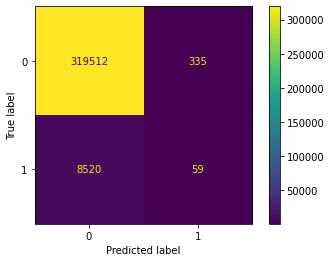

In [713]:
plot_confusion_matrix(rf_resample, X_test, y_test)

In [709]:
rf_balanced = RandomForestClassifier(class_weight='balanced')
rf_balanced.fit(X_train_frac, y_train_frac)

RandomForestClassifier(class_weight='balanced')

RF PR AUC: 0.096


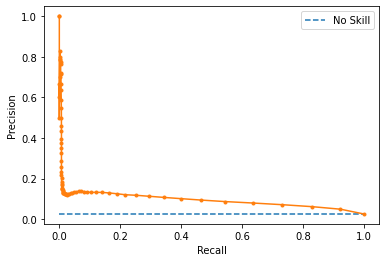

In [710]:
yhat = rf_balanced.predict_proba(X_test)
model_probs = yhat[:, 1]
# calculate the precision-recall auc
precision, recall, _ = precision_recall_curve(y_test, model_probs)
auc_score = auc(recall, precision)
print('RF PR AUC: %.3f' % auc_score)
plot_pr_curve(y_test, model_probs)

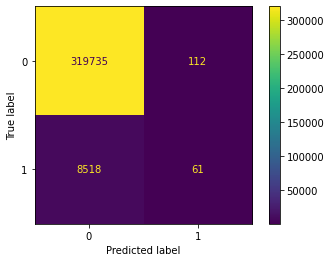

In [714]:
plot_confusion_matrix(rf_balanced, X_test, y_test)

In [736]:
rf_balanced_resample = RandomForestClassifier(class_weight='balanced')
rf_balanced_resample.fit(X_train_smtom_frac, y_train_smtom_frac)

RandomForestClassifier(class_weight='balanced')

RF PR AUC: 0.092


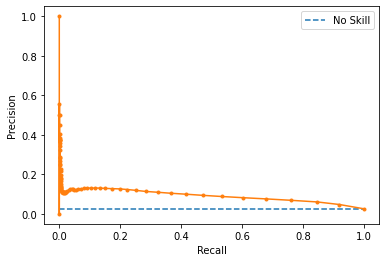

In [737]:
yhat = rf_balanced_resample.predict_proba(X_test)
model_probs = yhat[:, 1]
# calculate the precision-recall auc
precision, recall, _ = precision_recall_curve(y_test, model_probs)
auc_score = auc(recall, precision)
print('RF PR AUC: %.3f' % auc_score)
plot_pr_curve(y_test, model_probs)

It seems like smote-tomek resampling doesn't improve the model performance.

In [715]:
# TODO: Find optimal threshold 

XGBoost

In [762]:
xgb0 = xgb.XGBClassifier(scale_pos_weight = 5)
xgb0.fit(X_train_smtom_frac, y_train_smtom_frac)
xgb0.score(X_test, y_test)

[17:25:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.966921011125794

In [760]:
y_train_smtom_frac.sum()/len(y_train_smtom_frac)

0.1607713405151695

RF PR AUC: 0.110


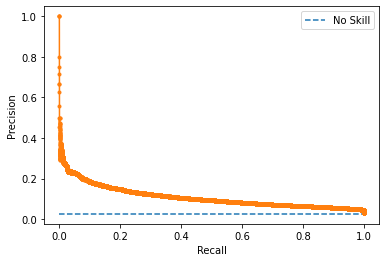

In [759]:
yhat = xgb0.predict_proba(X_test)
model_probs = yhat[:, 1]
# calculate the precision-recall auc
precision, recall, _ = precision_recall_curve(y_test, model_probs)
auc_score = auc(recall, precision)
print('RF PR AUC: %.3f' % auc_score)
plot_pr_curve(y_test, model_probs)

In [778]:
xgb_cv = xgb.XGBClassifier()
xgb_params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5],
        'scale_pos_weight': [np.sqrt(len(y_train)/y_train.sum()), len(y_train)/y_train.sum()]
        }
folds = 6
param_comb = 6
random_search_xgb = RandomizedSearchCV(xgb_cv, param_distributions = xgb_params, scoring='precision', 
                                       n_jobs=-1, cv=folds, verbose=3, random_state=1001 ).fit(X_train,y_train)
random_search_xgb.best_params_

Fitting 6 folds for each of 10 candidates, totalling 60 fits
[17:50:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


{'subsample': 1.0,
 'scale_pos_weight': 6.232495297594357,
 'min_child_weight': 5,
 'max_depth': 3,
 'gamma': 0.5,
 'colsample_bytree': 1.0}

In [785]:
xgb_tuned = xgb.XGBClassifier(subsample= 1.0, scale_pos_weight=np.sqrt(len(y_train)/y_train.sum()),min_child_weight= 5,max_depth= 3,gamma= 0.5,colsample_bytree= 1.0)
xgb_tuned.fit(X_train, y_train)
xgb_tuned.score(X_test, y_test)

[17:56:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9656056463251996

RF PR AUC: 0.157


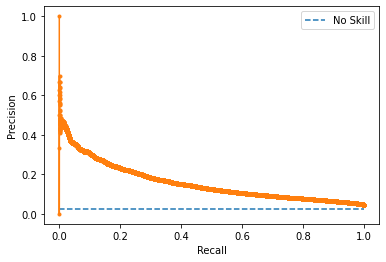

In [786]:
yhat = xgb_tuned.predict_proba(X_test)
model_probs = yhat[:, 1]
# calculate the precision-recall auc
precision, recall, _ = precision_recall_curve(y_test, model_probs)
auc_score = auc(recall, precision)
print('RF PR AUC: %.3f' % auc_score)
plot_pr_curve(y_test, model_probs)

<module 'matplotlib.pyplot' from 'c:\\users\\scui\\appdata\\local\\programs\\python\\python39\\lib\\site-packages\\matplotlib\\pyplot.py'>

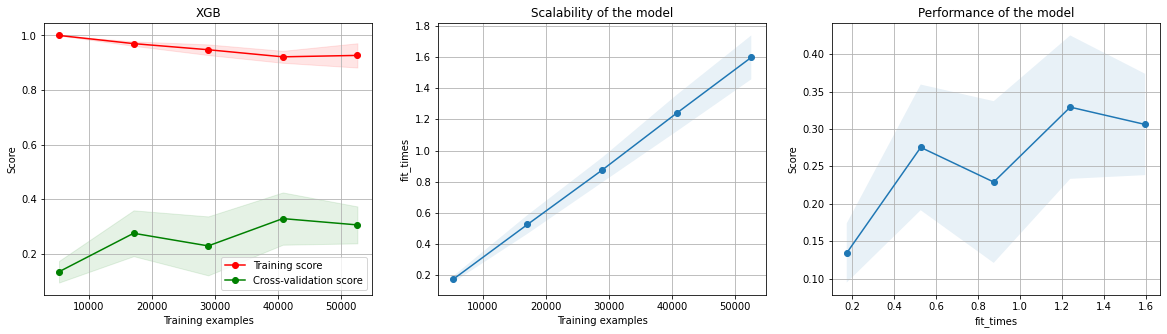

In [756]:
plot_learning_curve2(xgb.XGBClassifier(subsample= 0.8, min_child_weight= 5, max_depth= 5,gamma= 1,colsample_bytree= 0.8, eval_metric='mlogloss'), 'XGB', X_train_frac, y_train_frac, scoring = 'precision')

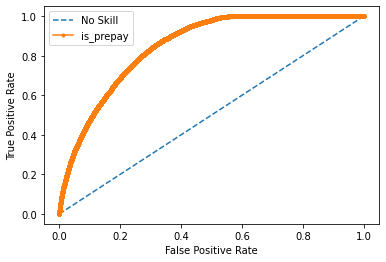

is_prepay AUC score:  0.8483524525369427


In [782]:
plot_roc(xgb_tuned,X_test, y_test, y_var)

In [787]:
xgb_tuned_resample = xgb.XGBClassifier(scale_pos_weight = np.sqrt(len(y_train)/y_train.sum()))
xgb_tuned_resample.fit(X_train, y_train)
xgb_tuned_resample.score(X_test, y_test)

[17:57:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9622502481533131

RF PR AUC: 0.172


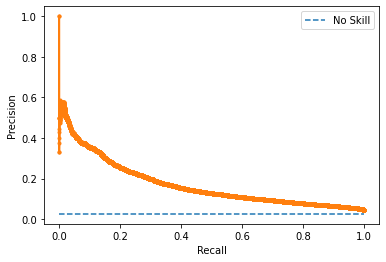

In [788]:
yhat = xgb_tuned_resample.predict_proba(X_test)
model_probs = yhat[:, 1]
# calculate the precision-recall auc
precision, recall, _ = precision_recall_curve(y_test, model_probs)
auc_score = auc(recall, precision)
print('RF PR AUC: %.3f' % auc_score)
plot_pr_curve(y_test, model_probs)

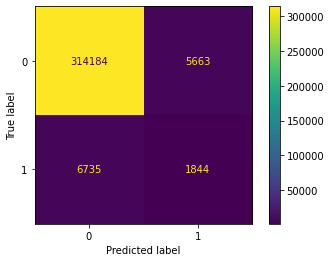

In [777]:
plot_confusion_matrix(xgb_tuned_resample, X_test, y_test)

There are other ML models, SVM, NB, KNN, other boosting algorithms, GBM, LGBM etc., but in theory they will not outperform XGB.

### Deep Learning Method

In [72]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
import torch.optim as optim

In [49]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using {} device'.format(device))

Using cpu device


In [50]:
EPOCHS = 50
BATCH_SIZE = 64
LEARNING_RATE = 0.001

In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_train, test_size=0.33, random_state=69)

In [65]:
y_train = y_train.values
y_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [66]:
## train data
class trainData(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)


train_data = trainData(torch.FloatTensor(X_train), 
                       torch.FloatTensor(y_train))
## test data    
class testData(Dataset):
    
    def __init__(self, X_data):
        self.X_data = X_data
        
    def __getitem__(self, index):
        return self.X_data[index]
        
    def __len__ (self):
        return len(self.X_data)
    

test_data = testData(torch.FloatTensor(X_test))

In [67]:
train_loader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=1)

In [80]:
X_train.shape

(220045, 30)

In [97]:
class binaryClassification(nn.Module):
    def __init__(self):
        super(binaryClassification, self).__init__()
        # Number of input features is 12.
        self.flatten = nn.Flatten()
        self.layer_stack = nn.Sequential(
            nn.Linear(30, 64), 
            nn.Linear(64, 64),
            nn.Linear(64, 1), 
            nn.ReLU(),
            nn.Dropout(p=0.1),
            nn.BatchNorm1d(64),
            nn.BatchNorm1d(64),
        )

        
    def forward(self, inputs):
        inputs = self.flatten(inputs)
        
        logits = self.layer_stack(inputs)
        
        return logits

In [ ]:
def train(dataloader, model, loss_fn, optimizer):
    

In [82]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)


cpu


In [83]:
def binary_acc(y_pred, y_test):
    y_pred_tag = torch.round(torch.sigmoid(y_pred))

    correct_results_sum = (y_pred_tag == y_test).sum().float()
    acc = correct_results_sum/y_test.shape[0]
    acc = torch.round(acc * 100)
    
    return acc

In [84]:
model = binaryClassification()
model.to(device)
print(model)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

binaryClassification(
  (layer_1): Linear(in_features=30, out_features=64, bias=True)
  (layer_2): Linear(in_features=64, out_features=64, bias=True)
  (layer_out): Linear(in_features=64, out_features=1, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.1, inplace=False)
  (batchnorm1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


In [101]:
model.train()

epoch_list = []
loss_list = []
acc_list = []
for e in range(1, EPOCHS+1):
    epoch_loss = 0
    epoch_acc = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        
        y_pred = model(X_batch)
        
        loss = criterion(y_pred, y_batch.unsqueeze(1))
        acc = binary_acc(y_pred, y_batch.unsqueeze(1))
        
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
    
    epoch_list.append(e)
    loss_list.append(epoch_loss/len(train_loader))
    acc_list.append(epoch_acc/len(train_loader))

    print(f'Epoch {e+0:03}: | Loss: {epoch_loss/len(train_loader):.5f} | Acc: {epoch_acc/len(train_loader):.3f}')

Epoch 001: | Loss: 0.09134 | Acc: 97.331
Epoch 002: | Loss: 0.09145 | Acc: 97.328
Epoch 003: | Loss: 0.09111 | Acc: 97.328
Epoch 004: | Loss: 0.09114 | Acc: 97.331
Epoch 005: | Loss: 0.09109 | Acc: 97.334
Epoch 006: | Loss: 0.09086 | Acc: 97.335
Epoch 007: | Loss: 0.09089 | Acc: 97.333
Epoch 008: | Loss: 0.09086 | Acc: 97.336
Epoch 009: | Loss: 0.09080 | Acc: 97.321
Epoch 010: | Loss: 0.09095 | Acc: 97.330
Epoch 011: | Loss: 0.09070 | Acc: 97.316
Epoch 012: | Loss: 0.09030 | Acc: 97.330
Epoch 013: | Loss: 0.09064 | Acc: 97.323
Epoch 014: | Loss: 0.09040 | Acc: 97.323
Epoch 015: | Loss: 0.09027 | Acc: 97.339
Epoch 016: | Loss: 0.09049 | Acc: 97.325
Epoch 017: | Loss: 0.09038 | Acc: 97.332
Epoch 018: | Loss: 0.09018 | Acc: 97.330
Epoch 019: | Loss: 0.09019 | Acc: 97.333
Epoch 020: | Loss: 0.09027 | Acc: 97.352
Epoch 021: | Loss: 0.08974 | Acc: 97.338
Epoch 022: | Loss: 0.09015 | Acc: 97.334
Epoch 023: | Loss: 0.08960 | Acc: 97.334
Epoch 024: | Loss: 0.08972 | Acc: 97.329
Epoch 025: | Los

In [108]:
acc_inverse = [(100 - i)/100 for i in acc_list]

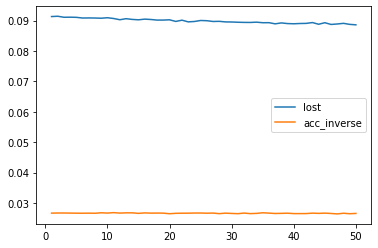

In [109]:
plt.plot(epoch_list, loss_list, label = 'lost')
plt.plot(epoch_list, acc_inverse, label = 'acc_inverse')
plt.legend()
plt.show()

In [86]:
y_pred_list = []
model.eval()
with torch.no_grad():
    for X_batch in test_loader:
        X_batch = X_batch.to(device)
        y_test_pred = model(X_batch)
        y_test_pred = torch.sigmoid(y_test_pred)
        y_pred_tag = torch.round(y_test_pred)
        y_pred_list.append(y_pred_tag.cpu().numpy())

y_pred_list = [a.squeeze().tolist() for a in y_pred_list]

In [91]:
confusion_matrix( y_test, y_pred_list)

array([[105471,    114],
       [  2749,     47]], dtype=int64)

In [94]:
print(classification_report(y_test, y_pred_list))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99    105585
           1       0.29      0.02      0.03      2796

    accuracy                           0.97    108381
   macro avg       0.63      0.51      0.51    108381
weighted avg       0.96      0.97      0.96    108381

